In [1]:
import sympy as sp
from sympy import *
import numpy as np
from random import random,uniform,randint
import matplotlib.pyplot as plt
import pandas as pd
import scipy as scipy

##Ejercicio 1 ##

Fuerza Bruta

Vamos a descubrir la contraseña de un candado

(a) Definir un número entero de 3 d´ıgitos al azar a tr´aves de la función random, simulando la clave de un candado.

(b) Programar un algoritmo de fuerza bruta para hallar la clave.

(c) Realizar el experimento al menos 100000 veces, anotando la cantidad de intentos realizados hasta hallar la respuesta.

(d) Realizar un histograma para gr´aficar los intentos. Las columnas del histograma ser´an separadas en 0-10, 10-20, 20-30, etc...

(e) ¿Sirve como m´etodo de b´usqueda de raíces?

(f) ¿Bajo que condiciones lo utilizaría?

(g) ¿Sería correcto hablar de convergencia?


(a) Definir un número entero de 3 dígitos al azar a tr´aves de la función random, simulando la clave de un candado.

In [2]:
numeroBuscado = randint(0,100)

(b) Programar un algoritmo de fuerza bruta para hallar la clave.

In [3]:
numeroBuscado = randint(0,100)
numero = 0
contador = 0
while numero != numeroBuscado:
  numero = randint(0,100)
  contador = contador + 1

(c) Realizar el experimento al menos 100000 veces, anotando la cantidad de intentos realizados hasta hallar la respuesta.

In [4]:
cantIteraciones = 100000
n = 0
vector = []

for n in range (cantIteraciones):
  contador = 0
  numeroGenerado = 0
  numeroBuscado = randint(0,1000)

  while numeroGenerado != numeroBuscado:
    numeroGenerado = randint(0,1000)
    contador = contador + 1

  vector.append(contador)



(d) Realizar un histograma para gr´aficar los intentos. Las columnas del histograma ser´an separadas en 0-10, 10-20, 20-30, etc...

In [5]:
totalIntentos = pd.DataFrame(vector)
totalIntentos.info()
totalIntentos = totalIntentos.rename(columns = {0:"columna"})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB


Text(0.5, 1.0, 'Histograma de busqueda de combinaciones de un candado')

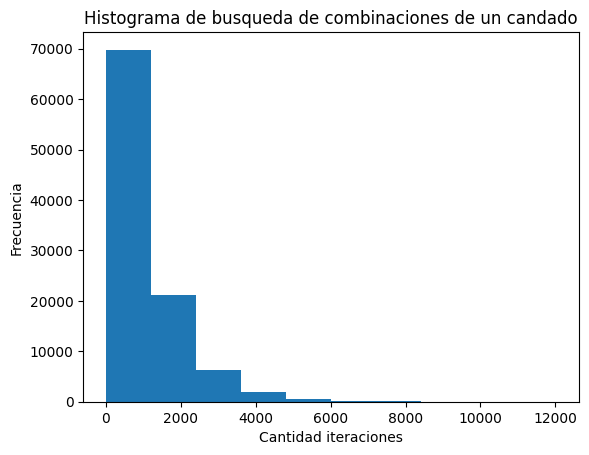

In [6]:
plt.hist(totalIntentos.columna, bins = 10)
plt.ylabel('Frecuencia')
plt.xlabel('Cantidad iteraciones')
plt.title('Histograma de busqueda de combinaciones de un candado')


e. No nos parece que sea un metodo eficiente de busqueda de raices ya que  hay pocas posibilidades de que encuentres la raiz. No hay una metodoliga en particular sino que es ir probando y no es eficiente.


f. En el unico caso que lo usaria es si no tengo conocimiento de ningun otro metodo para busacar raices, o en el caso en que el rango sea muy chico.

g. En este caso me parece que no es correcto hablar de convergencia, ya que aunque siempre se encuentre la solución que se esta buscando no se sabe en la cantidad de iteraciones en la que se va a encontrar, no tiene una convergencia previamente definida como en el caso de Newton Raphson que sabemos que tiene una convergencia cuadratica o en el caso de bisección que tiene una convergencia linial.

# Ejercicio 2

2. Hallar π por dos caminos

(a) Programar un algoritmo para aproximar π utilizando la funci´on seno(x) con el m´etodo de Newton-Raphson, en función de x, que realice iteraciones hasta alcanzar el límite de la herramienta utilizada.

(b) Programar un algoritmo para aproximar π utilizando la serie de Leibniz, en funci´on de n.

(c) Ejecutar los programas solicitados en a y b utilizando representaci´on de punto flotante de 32 bits y comparar las respuestas obtenidas con n = 10, n = 100, n = 1000, n = 10000 y n = 100000.

(d) Ejecutar los programas solicitados en a y b utilizando representaci´on de punto flotante de 64 bits y comparar las respuestas obtenidas con n = 10, n = 100, n = 1000, n = 10000 y n = 100000.

(e) (OPCIONAL) Ejecutar los programas solicitados en a y b con una calculadora (aclarar marca y modelo) y comparar las respuestas obtenidas con n = 10, n = 100, n = 1000, n = 10000 y n = 100000 (en caso de no alcanzar la memoria de la calculadora utilizar el máximo n posible).

(f) Representar las dos respuestas finales obtenidas (para n = 100000 y el m´etodo de Newton Raphson) en c, d y e de manera de expresarlo como π = ¯π + ∆π.

(g) ¿Podemos afirmar qué para la computadora el n´umero π es una constante?

### Newton-Raphson

In [ ]:
def NewtonRaphson64Bits(x0,tolerancia,interacionesMax, tabla):
        x0 = x0
        contador = 0
        x1 = x0-f(x0)/fd(x0)
        while ((contador < interacionesMax) and abs((x1 - x0) / x1) > tolerancia):
            tabla.loc[contador] = [x0, x1]
            x0 = x1
            x1 = x0-f(x0)/fd(x0)
            contador += 1
        print('El método de Newton Raphson convergió en',contador,'iteraciones', "y el valor de x es:",x1)
        return(x1)

In [ ]:
def NewtonRaphson32Bits(x0,tolerancia,interacionesMax):
        x0 = x0
        contador = 0
        x1 = np.float32(x0-f(x0)/fd(x0))
        while ((contador < interacionesMax) and abs((x1 - x0) / x1) > tolerancia):
            x0 = x1
            x1 = np.float32(x0-f(x0)/fd(x0))
            contador += 1
        print('El método de Newton Raphson convergió en',contador,'iteraciones', "y el valor de x es:",x1)
        return(x1)

## Respuestas


### (a)
Para que alcance el limite de la herramienta utilizada lo que hicimos fue proponer que la tolerancia sea igual a 0. Tomamos como semilla a 3.

In [ ]:
X0=3
tolerancia=0
iteracionesMax = 100
#Primero trabajamos con la función simbólicamente para que calcule la derivada
x = sp.symbols('x')
y = (sp.sin(x)) #Acá hay que escribor la función a analizar. OJO que sympy es un poco distinto a numpy
yd = sp.diff(y,x) #Calcula la derivada simbólica

#Con el comando "sp.lambdify" pasamos a que evalúe numéricamente
f=sp.lambdify(x,y)
fd=sp.lambdify(x,yd)

tabla = pd.DataFrame(columns=('Semilla_0','Semilla_1'))

NewtonRaphson64Bits(X0,tolerancia,iteracionesMax,tabla)


El método de Newton Raphson convergió en 3 iteraciones y el valor de x es: 3.141592653589793


3.141592653589793

### (b)

Serie de Leibniz


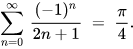


Cuando trabajamos con 64 bits tenemos 15 cifras significativas y cuando trabajamos con 32 bits tenemos 8 cifras significativas.

In [ ]:
def serieDeLeibniz64Bits(tolerancia,iteracionesMax):

  #Inicializamos la serie que vamos a sumar
  serie = 0
  denominador = 1
  #Inicializamos el índice con que vamos a crear los signos.
  i = 0
  contador = 0

  while np.abs(serie*4 - np.pi) > tolerancia and contador < iteracionesMax :
    serie = serie + (-1)**i / denominador
    denominador += 2
    i +=1
    contador += 1
  print('La serie de Leibniz convergió en',contador,'iteraciones', "y el valor de π es:",serie*4)

  return(serie*4)

In [ ]:
def serieDeLeibniz32Bits(tolerancia,iteracionesTotales):
  serie =np.float32(0)
  denominador = np.float32(1)
  i = 0
  contador = 0

  while np.abs(np.float32(serie*4) - np.float32(np.pi)) > np.float32(tolerancia) and contador < iteracionesTotales :
    serie = np.float32(serie + (-1)**i / denominador)
    denominador += 2
    i +=1
    contador += 1
  print('La serie de Leibniz convergió en',contador,'iteraciones', "y el valor de π es:", np.float32(serie*4))

  return(np.float32(serie*4))


### (c)

In [ ]:
#Newton Raphson 32 bits

x = sp.symbols('x')
y = (sp.sin(x))
yd = sp.diff(y,x)

f=sp.lambdify(x,y)
fd=sp.lambdify(x,yd)

X0=2.5
tolerancia = 0

print("")
print("Newton Raphson")
print("")

iteracionesMax = 10
NewtonRaphson32Bits(X0,tolerancia,iteracionesMax)

iteracionesMax = 100
NewtonRaphson32Bits(X0,tolerancia,iteracionesMax)

iteracionesMax = 1000
NewtonRaphson32Bits(X0,tolerancia,iteracionesMax)

iteracionesMax = 10000
NewtonRaphson32Bits(X0,tolerancia,iteracionesMax)

iteracionesMax = 100000
NewtonRaphson32Bits(X0,tolerancia,iteracionesMax)


#Serie de Leibniz 32 bits
print("")
print("------------------------------------------------------------------------------------")
print("")
print("Serie de Leibniz")
print("")

tolerancia = 0
iteracionesMax = 10
serieDeLeibniz32Bits(tolerancia,iteracionesMax)

iteracionesMax = 100
serieDeLeibniz32Bits(tolerancia,iteracionesMax)

iteracionesMax = 1000
serieDeLeibniz32Bits(tolerancia,iteracionesMax)

iteracionesMax = 10000
serieDeLeibniz32Bits(tolerancia,iteracionesMax)

iteracionesMax = 100000
serieDeLeibniz32Bits(tolerancia,iteracionesMax)







Newton Raphson

El método de Newton Raphson convergió en 3 iteraciones y el valor de x es: 3.1415927
El método de Newton Raphson convergió en 3 iteraciones y el valor de x es: 3.1415927
El método de Newton Raphson convergió en 3 iteraciones y el valor de x es: 3.1415927
El método de Newton Raphson convergió en 3 iteraciones y el valor de x es: 3.1415927
El método de Newton Raphson convergió en 3 iteraciones y el valor de x es: 3.1415927

------------------------------------------------------------------------------------

Serie de Leibniz

La serie de Leibniz convergió en 10 iteraciones y el valor de π es: 3.0418398
La serie de Leibniz convergió en 100 iteraciones y el valor de π es: 3.1315928
La serie de Leibniz convergió en 1000 iteraciones y el valor de π es: 3.1405928
La serie de Leibniz convergió en 10000 iteraciones y el valor de π es: 3.1414983
La serie de Leibniz convergió en 100000 iteraciones y el valor de π es: 3.1415856


3.1415856

### (d)


In [ ]:
x = sp.symbols('x')
y = (sp.sin(x))
yd = sp.diff(y,x)

f=sp.lambdify(x,y)
fd=sp.lambdify(x,yd)

X0=2.5
tolerancia = 0

iteracionesMax = 10

print("")
print("Newton Raphson")
print("")

tabla1 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla2 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla3 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla4 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla5 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))

prueba = NewtonRaphson64Bits(X0,tolerancia,iteracionesMax,tabla1)

iteracionesMax = 100
prueba = NewtonRaphson64Bits(X0,tolerancia,iteracionesMax,tabla2)

iteracionesMax = 1000
prueba = NewtonRaphson64Bits(X0,tolerancia,iteracionesMax,tabla3)

iteracionesMax = 10000
prueba = NewtonRaphson64Bits(X0,tolerancia,iteracionesMax,tabla4)

iteracionesMax = 100000
prueba = NewtonRaphson64Bits(X0,tolerancia,iteracionesMax,tabla5)

#Serie de Leibniz 32 bits
print("")
print("------------------------------------------------------------------------------------")
print("")
print("Serie de Leibniz")
print("")

tolerancia = 0
iteracionesMax = 10
serieDeLeibniz64Bits(tolerancia,iteracionesMax)

iteracionesMax = 100
serieDeLeibniz64Bits(tolerancia,iteracionesMax)

iteracionesMax = 1000
serieDeLeibniz64Bits(tolerancia,iteracionesMax)

iteracionesMax = 10000
serieDeLeibniz64Bits(tolerancia,iteracionesMax)

iteracionesMax = 100000
serieDeLeibniz64Bits(tolerancia,iteracionesMax)


Newton Raphson

El método de Newton Raphson convergió en 4 iteraciones y el valor de x es: 3.141592653589793
El método de Newton Raphson convergió en 4 iteraciones y el valor de x es: 3.141592653589793
El método de Newton Raphson convergió en 4 iteraciones y el valor de x es: 3.141592653589793
El método de Newton Raphson convergió en 4 iteraciones y el valor de x es: 3.141592653589793
El método de Newton Raphson convergió en 4 iteraciones y el valor de x es: 3.141592653589793

------------------------------------------------------------------------------------

Serie de Leibniz

La serie de Leibniz convergió en 10 iteraciones y el valor de π es: 3.0418396189294032
La serie de Leibniz convergió en 100 iteraciones y el valor de π es: 3.1315929035585537
La serie de Leibniz convergió en 1000 iteraciones y el valor de π es: 3.140592653839794
La serie de Leibniz convergió en 10000 iteraciones y el valor de π es: 3.1414926535900345
La serie de Leibniz convergió en 100000 iteraciones y el val

3.1415826535897198

###(f)


In [ ]:
#Newton Raphson
x = sp.symbols('x')
y = (sp.sin(x))
yd = sp.diff(y,x)

f=sp.lambdify(x,y)
fd=sp.lambdify(x,yd)

X0=2.5
tolerancia = 10**(-7)
iteracionesMax = 100000
valor32Bits = NewtonRaphson32Bits(X0,tolerancia,iteracionesMax)
print(valor32Bits, ' +- ' ,np.float32(tolerancia))
iteracionesMax = 100000
print("")
valor64Bits = NewtonRaphson64Bits(X0,tolerancia,iteracionesMax,tabla5)
print(valor64Bits, ' +- ' ,tolerancia)

El método de Newton Raphson convergió en 3 iteraciones y el valor de x es: 3.1415927
3.1415927  +-  1e-07

El método de Newton Raphson convergió en 3 iteraciones y el valor de x es: 3.141592653589793
3.141592653589793  +-  1e-07


###(g)
Pi no es una constante, el valor va a depender con el método que implementado para calcularlo y la presetanción que se este usando.

#Ejercicio 3

### Bisección

In [ ]:
#programo el método bisección
def biseccion(a, b , tolerancia , iteracionesMax, tabla):

        a = a
        b = b
        contador = 0
        x0, x1 = a, b
        if(f(a) * f(b)>0):         #condicion de aplicabilidad del método
            print( "El método no resuelve este tipo de raíz")
            return
        while (contador < iteracionesMax) and (abs((x1 - x0) / x1) > tolerancia):
            tabla.loc[contador] = [x0, x1]
            x0 = x1
            x1 = (a + b)/2
            if f(x1) * f(a) < 0:
                b = x1
            else:
                a = x1
            contador += 1
        error = abs((x1 - x0) / x1)
        print('El método de bisección convergió en',contador,'iteraciones y el valor de x es: ',x1 )


### Punto Fijo

In [ ]:
#programo el método punto fijo

def puntoFijo(x0 , tolerancia, iteracionesMax, tabla):
        xn = x0
        contador = 0
        xn_1 = g(xn) #Cuando decimos xn_1 nos referimos a xn+1.
        while (contador < iteracionesMax) and (abs((xn_1 - xn) / xn_1) > tolerancia):
            tabla.loc[contador] = [xn, xn_1]
            xn = xn_1
            xn_1 = g(xn)
            contador += 1
        print('El método de punto fijo convergió en',contador,'iteraciones y el valor de x es: ', xn)

### Newton Raphson modificado

In [ ]:
def newtonRaphsonModificado(x0,tolerancia,interacionesMax, tabla):
        xn = x0
        contador = 0
        xn_1 = xn-f(xn)/(((fd(xn))**2)-f(xn)*fdd(xn))
        while ((contador < interacionesMax) and abs((xn_1 - xn) / xn_1) > tolerancia):
            tabla.loc[contador] = [xn, xn_1]
            xn = xn_1
            xn_1 = xn-f(xn)/(((fd(xn))**2)-f(xn)*fdd(xn))
            contador += 1
        print('El método de Newton Raphson modificado convergió en',contador,'iteraciones', "y el valor de x es:",xn_1)
        return(xn_1)

### Secante

In [ ]:
def secante(a , b, tolerancia, iteracioenesMax, tabla):
        x0 = a
        x1 = b
        print(abs((x1 - x0) / x1))
        print(tolerancia)
        contador = 0
        x2 = x1-f(x1)*(x1-x0)/(f(x1)-f(x0))
        while (contador < iteracioenesMax) and (abs((x1 - x0) / x1) > tolerancia):
            tabla.loc[contador] = [x0, x1, x2]
            x0 = x1
            x1 = x2
            x2 = x1-(f(x1)*(x1-x0))/(f(x1)-f(x0))
            contador += 1
        print('El método Secante convergió en',contador,'iteraciones y el valor de la x es ',x1)

## Respuestas

### Funciones Auxiliares para los graficos del item d)

In [ ]:
def Calculo_constante_asintotica(tabla, grado, cadena):

  x = 0;
  tabla_ca = pd.DataFrame()
  tabla_ca[cadena] = 0
  for i in range(0 , len(tabla)):
    #tabla_ca.Constante_asintotica = abs(tabla.loc[i].Semilla_1 - tabla.loc[i].Semilla_0)/(abs(tabla.loc[i-1].Semilla_1 - tabla.loc[i-1].Semilla_0)**grado)
    if i == 0:
      tabla_ca.loc[0] = [0]
    else:
      tabla_ca.loc[i] = [abs(tabla.loc[i].Semilla_0 - tabla.loc[i - 1].Semilla_0)/(abs(tabla.loc[i].Semilla_1 - tabla.loc[i].Semilla_0)**grado)]
  tabla[cadena] = tabla_ca



In [ ]:
def Calculo_grado_convergencia(tabla, cadena):

  tabla_gc = pd.DataFrame()
  tabla_gc[cadena] = 0
  for i in range(0, len(tabla)):
    if(i == 0 or i == 1):
      tabla_gc.loc[i] = [0]
    else:
      tabla_gc.loc[i] = (np.log(abs((tabla.loc[i].Semilla_1 - tabla.loc[i].Semilla_0)/(tabla.loc[i].Semilla_0 - tabla.loc[i - 1].Semilla_0))))/(np.log(abs((tabla.loc[i].Semilla_0 - tabla.loc[i-1].Semilla_0)/(tabla.loc[i-1].Semilla_0 - tabla.loc[i-2].Semilla_0))))
  tabla[cadena] = tabla_gc



In [ ]:
def Calculo_log_xc_xr(tabla, x_real, cadena):

  tabla_xc_xr = pd.DataFrame()
  tabla_xc_xr[cadena] = 0
  for i in range(0, len(tabla)):
    tabla_xc_xr.loc[i] = np.log(abs(tabla.loc[i].Semilla_1 - x_real))
  tabla[cadena] = tabla_xc_xr

In [ ]:
def Calculo_log_error(tabla, cadena):

  tabla_error = pd.DataFrame()
  tabla_error[cadena] = 0
  for i in range(0, len(tabla)):
    tabla_error.loc[i] = np.log(abs(tabla.loc[i].Semilla_1 - tabla.loc[i].Semilla_0))
  tabla[cadena] = tabla_error

In [ ]:
def Completar_datos(tabla, x_real, grado):
  Calculo_constante_asintotica(tabla, grado, "Constante_asintotica")
  Calculo_grado_convergencia(tabla, "Grado_convergencia")
  Calculo_log_error(tabla, "Log(|Semilla_1 - Semilla_0|)")
  Calculo_log_xc_xr(tabla, x_real,  "Log(|x_candidata - x_real|)")


### Justificación general de existencia y unicidad de la g(x)

Luego de haber encontrado las g(x) para cada uno de los ejemplos lo que hicimos fue probar la existencia y unicidad de forma gráfica. Para poder hacerlo tuvimos que buscar un intervalo, que para el caso lo encontramos probando.


En el caso existencia trabajamos con la g(x), propusimos que si g(x) ϵ C [a,b] y g(x) ϵ [a,b] para todo x ϵ [a,b], entonces g(x) tiene un punto fijo en [a,b]. En otras palabras y viendolo de forma gráfica armamos un cuadrado el cual estaba delimitado tanto en el eje x como en el eje y por el intervalo dado y buscamos probar que la función salga por los laterales de este.

En el caso de la unicidad trabajamos con la derivada de g(x) y verificamos que se cumpla | g'(x) | <= k, siendo k <= 1.


A continuación, en cada una de las funciones vamos a presentar los gráficos que prueben lo explicado anteriormente.


## Función f1

### a)

Graficamos la función acotada en el intervalo [0;3]

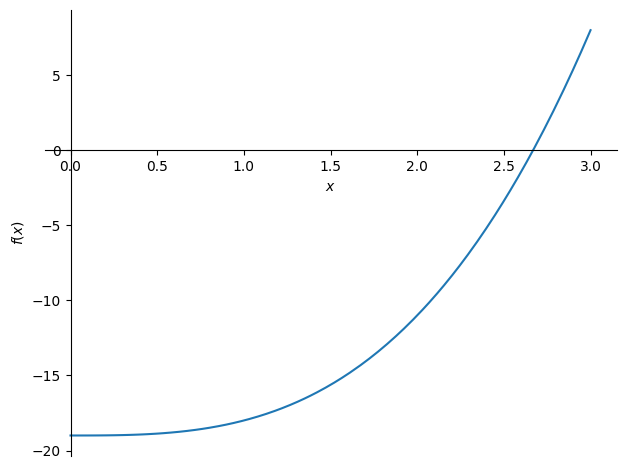

In [ ]:
#Primero trabajamos con la función simbólicamente para que calcule la derivada
x = sp.symbols('x')
y = (x**(3)-19) #Acá hay que escribor la función a analizar. OJO que sympy es un poco distinto a numpy
yd = sp.diff(y,x) #Calcula la derivada simbólica
ydd = sp.diff(yd,x)

#Con el comando "sp.lambdify" pasamos a que evalúe numéricamente
f = sp.lambdify(x,y)
fd = sp.lambdify(x,yd)
fdd = sp.lambdify(x,ydd)

plot(y,(x,0,3))


Aplicamos todos los métodos de busqueda de raices para f(x) con diferentes tolerancias.

### b)

In [ ]:
iteracionesMax = 1000
tolerancia1 = 10**(-5)
tolerancia2 = 10**(-13)
semilla = 0.5


a = 0
b = 3

def g(x):
    return ((19/(x**2) + 2*x)/3)

#Newton Raphson
tabla_NR_normal_F1_T1 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla_NR_normal_F1_T2 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
NewtonRaphson64Bits(semilla,tolerancia1,iteracionesMax, tabla_NR_normal_F1_T1)
NewtonRaphson64Bits(semilla,tolerancia2,iteracionesMax, tabla_NR_normal_F1_T2)

#Biseccion
tabla_Bi_F1_T1 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla_Bi_F1_T2 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
print (" ")
biseccion(a,b,tolerancia1,iteracionesMax, tabla_Bi_F1_T1)
biseccion(a,b,tolerancia2,iteracionesMax, tabla_Bi_F1_T2)
print (" ")

#Punto Fijo]

tabla_PF_F1_T1 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla_PF_F1_T2 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
puntoFijo(semilla,tolerancia1,iteracionesMax, tabla_PF_F1_T1)
puntoFijo(semilla,tolerancia2,iteracionesMax, tabla_PF_F1_T2)

#Secante
tabla_SE_F1_T1 = pd.DataFrame(columns=('Semilla_0','Semilla_1', 'Semilla_2'))
tabla_SE_F1_T2 = pd.DataFrame(columns=('Semilla_0','Semilla_1', 'Semilla_2'))
print ("")
secante(a,b,tolerancia1,iteracionesMax, tabla_SE_F1_T1)
secante(a,b,tolerancia2,iteracionesMax, tabla_SE_F1_T2)
print (" ")

#Newton Raphson Modificado
tabla_NR_modificado_F1_T1 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla_NR_modificado_F1_T2 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
newtonRaphsonModificado(semilla,tolerancia1,iteracionesMax, tabla_NR_modificado_F1_T1)
newtonRaphsonModificado(semilla,tolerancia2,iteracionesMax, tabla_NR_modificado_F1_T2)
print("")


El método de Newton Raphson convergió en 10 iteraciones y el valor de x es: 2.668401648721945
El método de Newton Raphson convergió en 11 iteraciones y el valor de x es: 2.668401648721945
 
El método de bisección convergió en 17 iteraciones y el valor de x es:  2.6684188842773438
El método de bisección convergió en 44 iteraciones y el valor de x es:  2.6684016487220674
 
El método de punto fijo convergió en 10 iteraciones y el valor de x es:  2.6684016643744815
El método de punto fijo convergió en 11 iteraciones y el valor de x es:  2.668401648721945

1.0
1e-05
El método Secante convergió en 6 iteraciones y el valor de la x es  2.6684016493334815
1.0
1e-13
El método Secante convergió en 8 iteraciones y el valor de la x es  2.668401648721945
 
El método de Newton Raphson modificado convergió en 157 iteraciones y el valor de x es: 2.6678686691109905
El método de Newton Raphson modificado convergió en 541 iteraciones y el valor de x es: 2.6684016487165634



In [ ]:
tabla_NR_normal_F1_T1

,Semilla_0,Semilla_1
0,0.500000,25.666667
1,25.666667,17.120725
2,17.120725,11.435423
3,11.435423,7.672047
4,7.672047,5.222297
5,5.222297,3.713757
6,3.713757,2.935042
7,2.935042,2.691892
8,2.691892,2.668606
9,2.668606,2.668402


Para este caso, probamos buscar g(x), de la forma g(x)=x-ϕ(x)f(x), como vimos en la cursada, en donde nos encontramos con el problema de que mediante esta forma no podíamos encontrar una g(x) que fuera admisible con lo cual, el metodo divergía siempre. Para encontrar una g(x) admisible lo que hicimos fue realizar distintos gráficos en la graficadora hasta encontrar una funcion que cumpla con las condiciones de que efectivamente es admisible. El grafico de la última prueba realizada es el que se muestra más abajo en una imagen proveniente de GeoGebra (elegimos este medio ya que era muy práctico), en donde se puede ver la funcion identidad intersecta en un unico punto a la funcion g(x), cuya unida intersección es el valor de la raiz buscada.

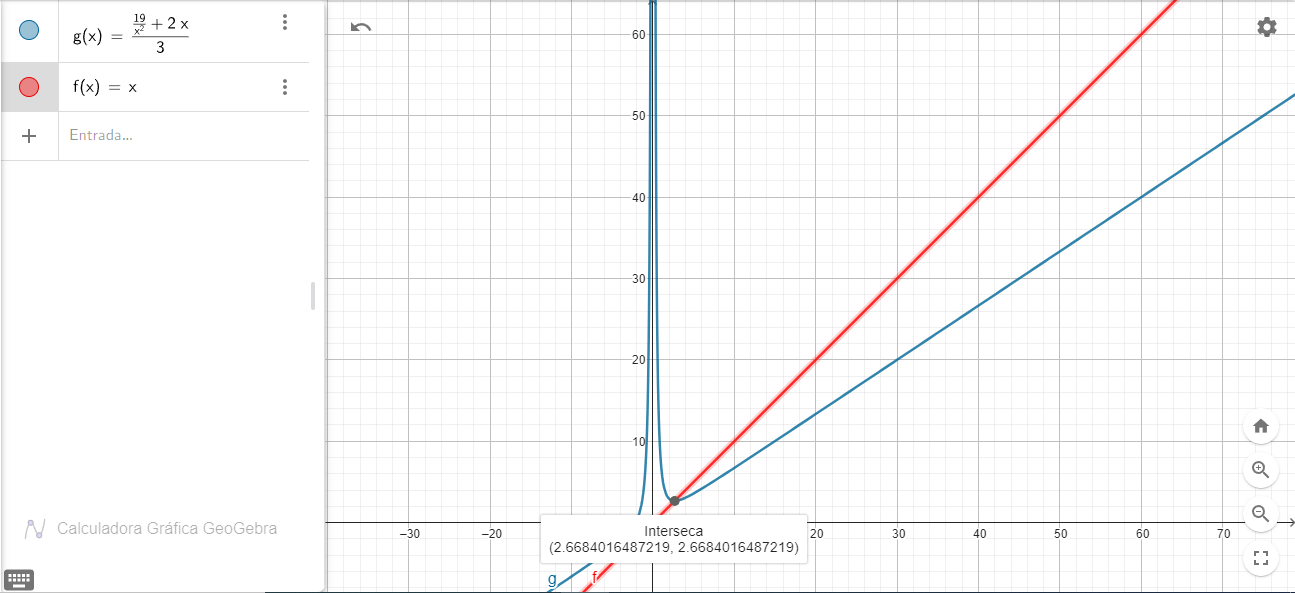

Una vez que ya encontramos la g(x) lo que hicimos fue probar su existencia y unicidad de forma gráfica. En este caso el intervalo que utilizamos para verificar ambas condiciones fue: [2.6 , 2.7].


En el primer grafico mostramos la g(x) y en el segundo g'(x)


**Existencia**

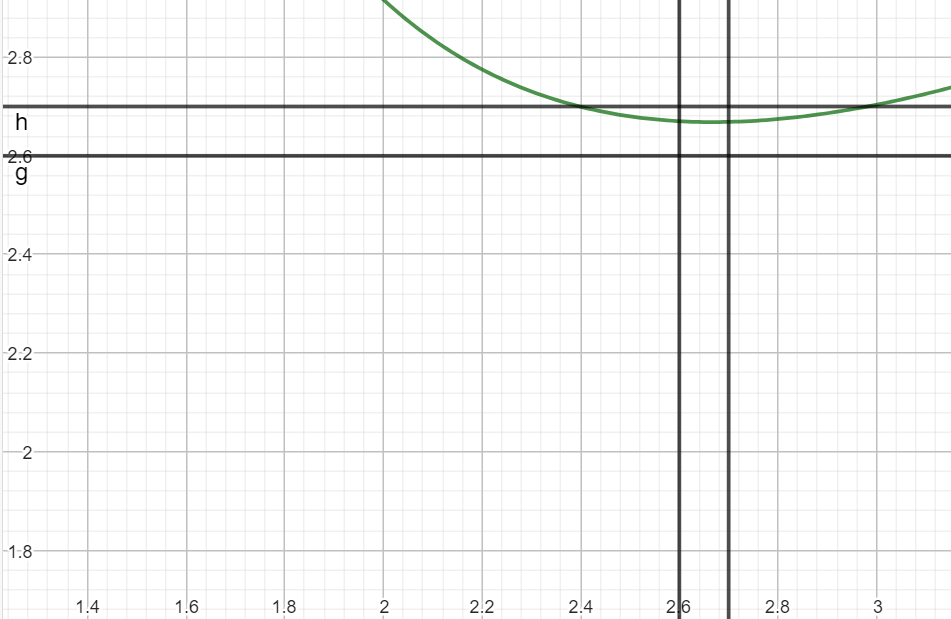

**Unicidad**
  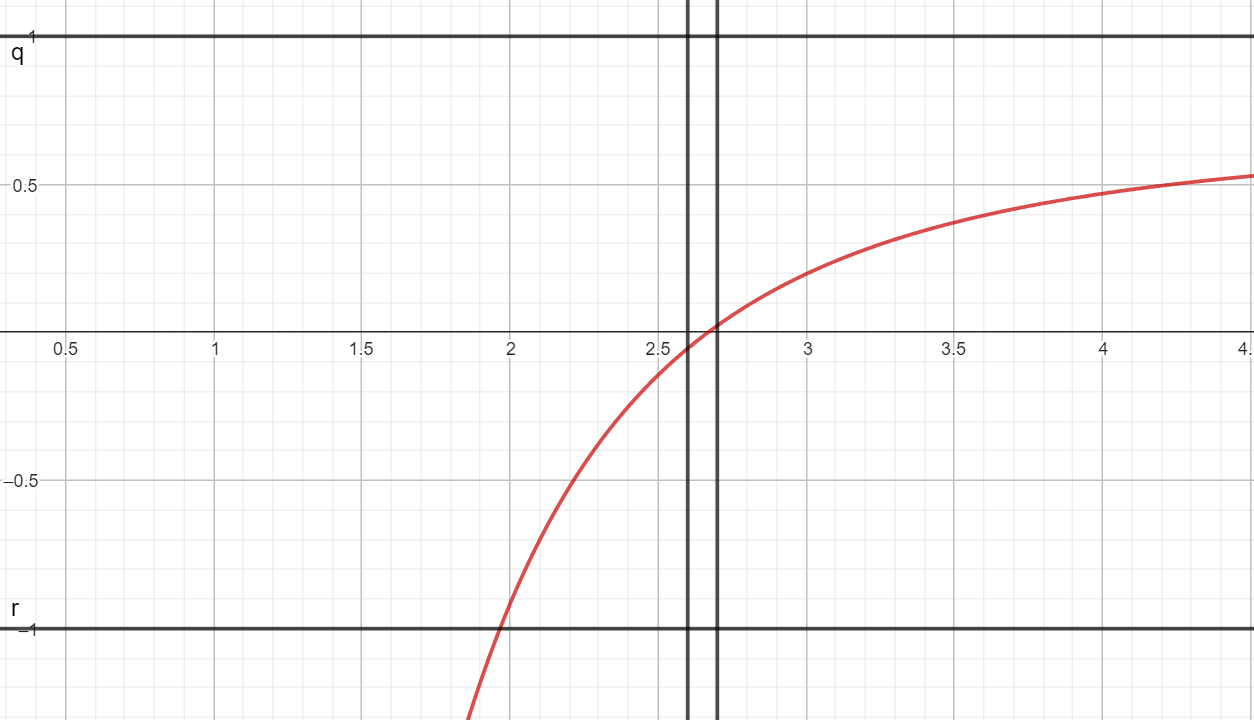

### c)

In [ ]:
x_real_1 = scipy.optimize.brentq(f, 0, 3)

###  d)

In [ ]:
#Calculo para la constante asintotica para cada metodo: Uso los ultimos terminos de la sucesion dependiendo de la cantidad maxima.

#Newton Raphson:
Completar_datos(tabla_NR_normal_F1_T1, x_real_1, 2)
Completar_datos(tabla_NR_normal_F1_T2, x_real_1, 2)

#Biseccion:
Completar_datos(tabla_Bi_F1_T1, x_real_1, 1)
Completar_datos(tabla_Bi_F1_T2, x_real_1, 1)


#Punto Fijo:
Completar_datos(tabla_PF_F1_T1, x_real_1, 1)
Completar_datos(tabla_PF_F1_T2, x_real_1, 1)

#Secante:
Completar_datos(tabla_SE_F1_T1, x_real_1, 2)
Completar_datos(tabla_SE_F1_T2, x_real_1, 2)

#Newton Raphson Modificado:
Completar_datos(tabla_NR_modificado_F1_T1, x_real_1, 2)
Completar_datos(tabla_NR_modificado_F1_T2, x_real_1, 2)

<ipython-input-12-2379ebbf1a7f>:6: RuntimeWarning: divide by zero encountered in log
  tabla_xc_xr.loc[i] = np.log(abs(tabla.loc[i].Semilla_1 - x_real))
<ipython-input-12-2379ebbf1a7f>:6: RuntimeWarning: divide by zero encountered in log
  tabla_xc_xr.loc[i] = np.log(abs(tabla.loc[i].Semilla_1 - x_real))


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


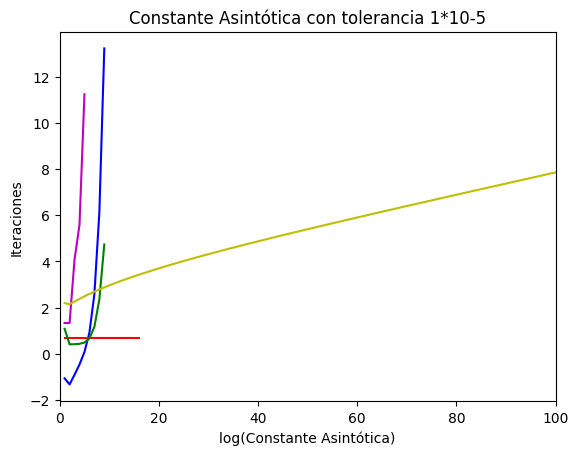

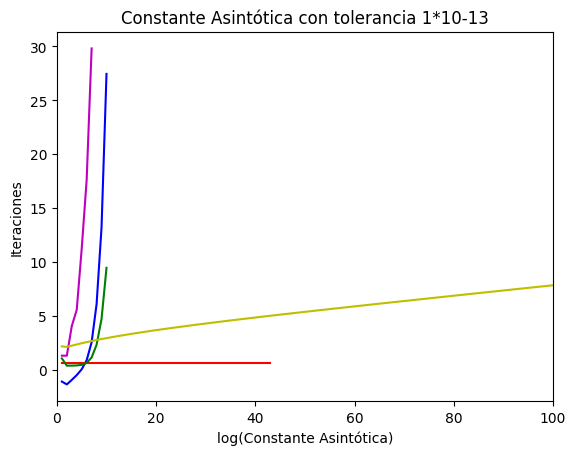

In [ ]:
#Constante asintotica con toletancia 1.

plt.plot(tabla_NR_normal_F1_T1.index,np.log(tabla_NR_normal_F1_T1["Constante_asintotica"]),'b',
         tabla_Bi_F1_T1.index, np.log(tabla_Bi_F1_T1["Constante_asintotica"]),'r',
         tabla_PF_F1_T1.index, np.log(tabla_PF_F1_T1["Constante_asintotica"]),'g',
         tabla_SE_F1_T1.index, np.log(tabla_SE_F1_T1["Constante_asintotica"]),'m',
         tabla_NR_modificado_F1_T1.index,np.log(tabla_NR_modificado_F1_T1["Constante_asintotica"]),'y')

plt.xlabel("log(Constante Asintótica)")
plt.ylabel("Iteraciones")
plt.xlim(0, 100)
plt.title("Constante Asintótica con tolerancia 1*10-5")
plt.show()

print(" ")

#Constante asintotica con toletancia 1.

plt.plot(tabla_NR_normal_F1_T2.index,np.log(tabla_NR_normal_F1_T2["Constante_asintotica"]),'b',
         tabla_Bi_F1_T2.index, np.log(tabla_Bi_F1_T2["Constante_asintotica"]),'r',
         tabla_PF_F1_T2.index, np.log(tabla_PF_F1_T2["Constante_asintotica"]),'g',
         tabla_SE_F1_T2.index, np.log(tabla_SE_F1_T2["Constante_asintotica"]),'m',
         tabla_NR_modificado_F1_T2.index,np.log(tabla_NR_modificado_F1_T2["Constante_asintotica"]),'y')

plt.xlabel("log(Constante Asintótica)")
plt.ylabel("Iteraciones")
plt.xlim(0,100)
plt.title("Constante Asintótica con tolerancia 1*10-13")
plt.show()


In [ ]:
tabla_SE_F1_T1

,Semilla_0,Semilla_1,Semilla_2,Constante_asintotica,Grado_convergencia,Log(|Semilla_1 - Semilla_0|),Log(|x_candidata - x_real|)
0,0.000000,3.000000,2.111111,0.000000,0.000000,1.098612,-1.103831
1,3.000000,2.111111,2.595758,3.796875,0.000000,-0.117783,-0.584669
2,2.111111,2.595758,2.686308,3.784397,0.498647,-0.724335,-2.622189
3,2.595758,2.686308,2.667907,59.108625,2.765668,-2.401856,-4.022616
4,2.686308,2.667907,2.668398,267.448847,0.949935,-3.995392,-7.612625
5,2.667907,2.668398,2.668402,76363.834366,2.274147,-7.619328,-12.621066


In [ ]:
tabla_NR_normal_F1_T2

,Semilla_0,Semilla_1,Constante_asintotica,Grado_convergencia,Log(|Semilla_1 - Semilla_0|),Log(|x_candidata - x_real|)
0,0.500000,25.666667,0.000000e+00,0.000000,3.225520,3.135419
1,25.666667,17.120725,3.445925e-01,0.000000,2.145457,2.670855
2,17.120725,11.435423,2.643948e-01,0.377359,1.737884,2.170997
3,11.435423,7.672047,4.014193e-01,1.012256,1.325316,1.610167
4,7.672047,5.222297,6.270963e-01,1.040631,0.895986,0.937620
5,5.222297,3.713757,1.076484e+00,1.129300,0.411143,0.044357
6,3.713757,2.935042,2.487710e+00,1.363849,-0.250110,-1.321856
7,2.935042,2.691892,1.317134e+01,1.760245,-1.414077,-3.751184
8,2.691892,2.668606,4.484376e+02,2.015390,-3.759923,-8.495526
9,2.668606,2.668402,5.575353e+05,2.018751,-8.495602,-17.972633


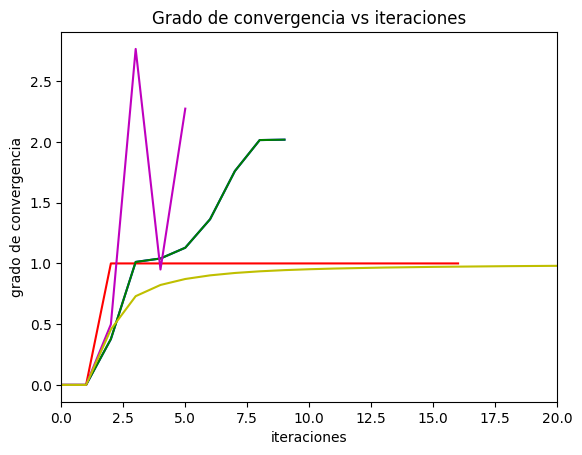

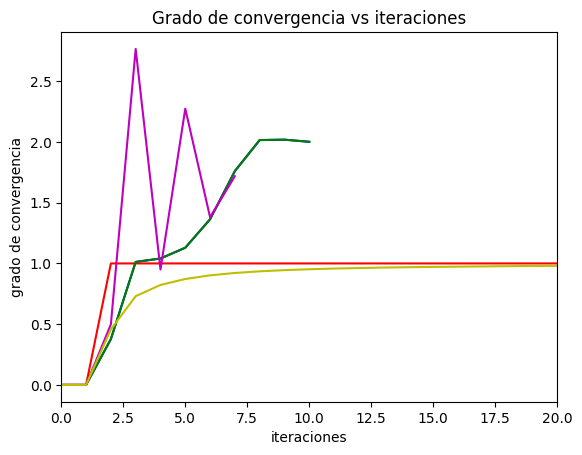

In [ ]:
#Grado de convergencia con tolerancia 1:

plt.plot(tabla_NR_normal_F1_T1.index,tabla_NR_normal_F1_T1.Grado_convergencia,'b',
         tabla_Bi_F1_T1.index, tabla_Bi_F1_T1.Grado_convergencia,'r',
         tabla_PF_F1_T1.index, tabla_PF_F1_T1.Grado_convergencia,'g',
         tabla_SE_F1_T1.index, tabla_SE_F1_T1.Grado_convergencia,'m',
         tabla_NR_modificado_F1_T1.index,tabla_NR_modificado_F1_T1.Grado_convergencia,'y',)

plt.xlabel("iteraciones")
plt.ylabel("grado de convergencia")
plt.xlim(0, 20)
plt.title("Grado de convergencia vs iteraciones")
plt.show()

print(" ")

#Grado de convergencia con toletancia 2:

plt.plot(tabla_NR_normal_F1_T2.index,tabla_NR_normal_F1_T2.Grado_convergencia,'b',
         tabla_Bi_F1_T2.index, tabla_Bi_F1_T2.Grado_convergencia,'r',
         tabla_PF_F1_T2.index, tabla_PF_F1_T2.Grado_convergencia,'g',
         tabla_SE_F1_T2.index, tabla_SE_F1_T2.Grado_convergencia,'m',
         tabla_NR_modificado_F1_T2.index,tabla_NR_modificado_F1_T2.Grado_convergencia,'y')

plt.xlabel("iteraciones")
plt.ylabel("grado de convergencia")
plt.xlim(0, 20)
plt.title("Grado de convergencia vs iteraciones")
plt.show()

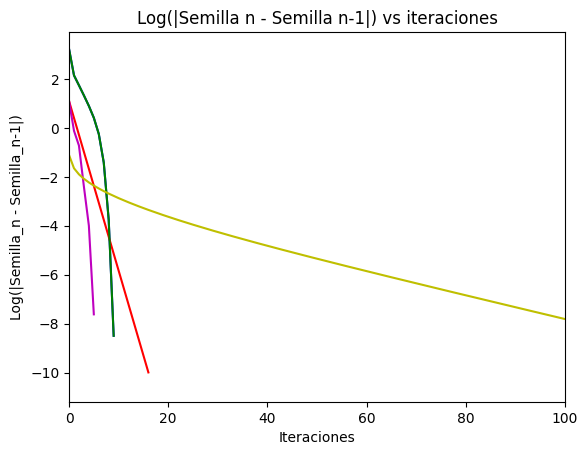

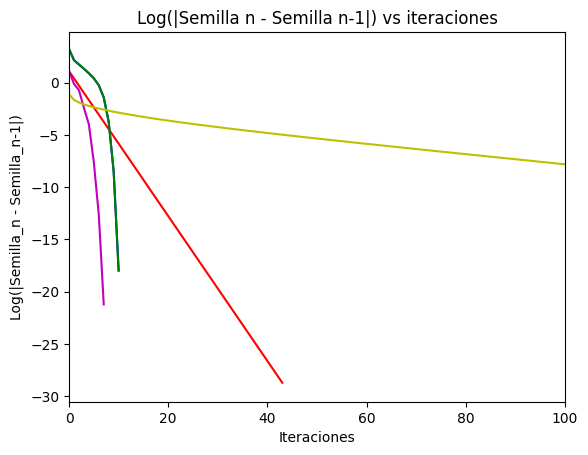

In [ ]:
#Log(|Semilla_1 - Semilla_0|) con toletancia 1.

plt.plot(tabla_NR_normal_F1_T1.index,tabla_NR_normal_F1_T1["Log(|Semilla_1 - Semilla_0|)"],'b',
         tabla_Bi_F1_T1.index, tabla_Bi_F1_T1["Log(|Semilla_1 - Semilla_0|)"],'r',
         tabla_PF_F1_T1.index, tabla_PF_F1_T1["Log(|Semilla_1 - Semilla_0|)"],'g',
         tabla_SE_F1_T1.index, tabla_SE_F1_T1["Log(|Semilla_1 - Semilla_0|)"],'m',
         tabla_NR_modificado_F1_T1.index,tabla_NR_modificado_F1_T1["Log(|Semilla_1 - Semilla_0|)"],'y')

plt.xlabel("Iteraciones")
plt.ylabel("Log(|Semilla_n - Semilla_n-1|)")
plt.xlim(0, 100)
plt.title("Log(|Semilla n - Semilla n-1|) vs iteraciones")
plt.show()

print(" ")

#Log(|Semilla_1 - Semilla_0|) con toletancia 2.

plt.plot(tabla_NR_normal_F1_T2.index,tabla_NR_normal_F1_T2["Log(|Semilla_1 - Semilla_0|)"],'b',
         tabla_Bi_F1_T2.index, tabla_Bi_F1_T2["Log(|Semilla_1 - Semilla_0|)"],'r',
         tabla_PF_F1_T2.index, tabla_PF_F1_T2["Log(|Semilla_1 - Semilla_0|)"],'g',
         tabla_SE_F1_T2.index, tabla_SE_F1_T2["Log(|Semilla_1 - Semilla_0|)"],'m',
         tabla_NR_modificado_F1_T2.index,tabla_NR_modificado_F1_T2["Log(|Semilla_1 - Semilla_0|)"],'y')

plt.xlabel("Iteraciones")
plt.ylabel("Log(|Semilla_n - Semilla_n-1|)")
plt.xlim(0, 100)
plt.title("Log(|Semilla n - Semilla n-1|) vs iteraciones")
plt.show()

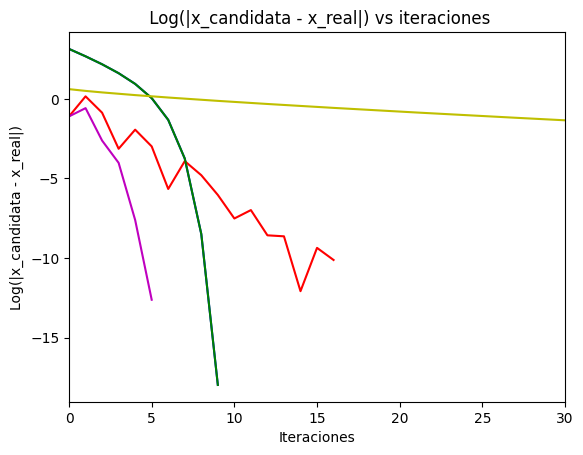

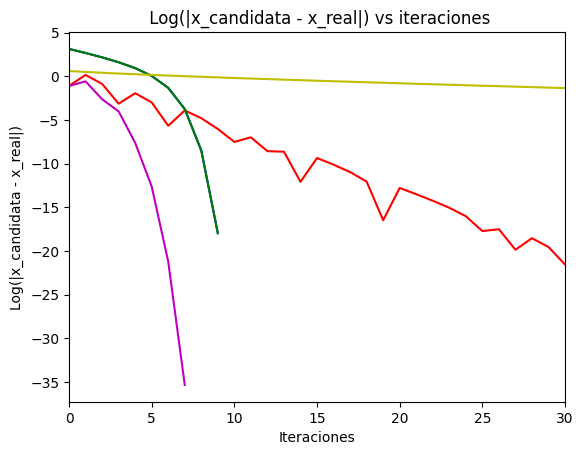

In [ ]:
#Log(|x_candidata - x_real|) con toletancia 1.

plt.plot(tabla_NR_normal_F1_T1.index,tabla_NR_normal_F1_T1["Log(|x_candidata - x_real|)"],'b',
         tabla_Bi_F1_T1.index, tabla_Bi_F1_T1["Log(|x_candidata - x_real|)"],'r',
         tabla_PF_F1_T1.index, tabla_PF_F1_T1["Log(|x_candidata - x_real|)"],'g',
         tabla_SE_F1_T1.index, tabla_SE_F1_T1["Log(|x_candidata - x_real|)"],'m',
         tabla_NR_modificado_F1_T1.index,tabla_NR_modificado_F1_T1["Log(|x_candidata - x_real|)"],'y')

plt.ylabel("Log(|x_candidata - x_real|)")
plt.xlabel("Iteraciones")
plt.xlim(0, 30)
plt.title(" Log(|x_candidata - x_real|) vs iteraciones")
plt.show()

print(" ")

#Log(|x_candidata - x_real|) con toletancia 2.

plt.plot(tabla_NR_normal_F1_T2.index,tabla_NR_normal_F1_T2["Log(|x_candidata - x_real|)"],'b',
         tabla_Bi_F1_T2.index, tabla_Bi_F1_T2["Log(|x_candidata - x_real|)"],'r',
         tabla_PF_F1_T2.index, tabla_PF_F1_T2["Log(|x_candidata - x_real|)"],'g',
         tabla_SE_F1_T2.index, tabla_SE_F1_T2["Log(|x_candidata - x_real|)"],'m',
         tabla_NR_modificado_F1_T2.index,tabla_NR_modificado_F1_T2["Log(|x_candidata - x_real|)"],'y')

plt.ylabel("Log(|x_candidata - x_real|)")
plt.xlabel("Iteraciones")
plt.xlim(0, 30)
plt.title(" Log(|x_candidata - x_real|) vs iteraciones")
plt.show()

### **Función f1**

A partir de aplicar los métodos de busqueda de raíces podemos ver que todos ellos convergieron en un valor similar, pero con distinta cantidad de iteraciones. Los comportamientos de los métodos fueron los esperados.


**Newton-Raphson modificado**


Tuvo alta cantidad de iteraciones antes de converger en comparación a los otros métodos ya que en la función f1(x) no tiene raíces multiples.

**Newton-Raphson y Punto Fijo**


Converge en la misma cantidad de iteraciones que Punto fijo ya que no se eligió una semilla suficientemente cercana a la raiz. Y la g(x) de punto fijo que elegimos es "similar" a la que tomamos en el caso de la g(x) de Newton Raphson.


**Bisección**


También dio un valor coherente dado que fue el método, sin considerar Newton Raphson modificado, que tardo más en converger. Esto es correcto dado que su grado de convergencia en uno.


**Secante**


En este caso fue el método que convergió primero dado que una de las semillas utilizadas era muy cercana a la raíz.


###Analisis de gráficos:


•	Constante asintótica: Para estos tipos de gráficos, decidimos trabajarlos en escala logarítmica (en base 10) por una cuestión de proporcionalidad entre las diferentes funciones, ya que variaban demasiado algunos valores, modificando demasiado la escala. Al realizar las operaciones, pudimos ver como en linead generales el constante asintótica está directamente relacionada con la convergencia de los metodos, en donde mientras más rápida es la convergencia mayor es el valor de la constaste. No obstante, en este caso, no nos sirve para determinar con precisión la eficiencia de los metodos ya que, por ejemplo, en el caso de Newton Raphson normal y Punto Fijo, a pesar de que tiene un comportamiento idéntico, no se ve reflejado en este gráfico.


•	Grado de convergencia: En el gráfico se puede ver Newton Raphson se comporta adecuadamente ya que su grado de convergencia es igual a 2, y en el caso de punto fijo también es lógico ya que es un comportamiento posible de un método con convergencia supra linial. Luego en el caso de bisección se comporta adecuadamente ya que tiene grado de convergencia linial, y newton Raphson modificado al no estar aplicado a una función con raíces multiples es lógico que su grado sea igual a uno. Y, por último, en el caso de la Secante, no se puede apreciar cuál es su grado de convergencia ya que la misma converge en muy pocas iteraciones.


•	Diferencia en escala logarítmica entre dos iteraciones consecutiva: Dado a como se dijo anteriormente que la Secante era la que convergía en menos iteraciones su diferencia en escala logarítmica entre iteraciones sucesivas va a tender más rápida a menos infinito en comparación a los demás métodos. Y en el caso de Newton Raphson modificado se ve que es la que más tarda en tender a menos infinito porque la diferencia entre iteraciones sucesivas es la que menos varía respecto a las iteraciones.


•	Diferencia en escala logarítmica entre la iteración_n y el valor "real" de la raiz: En los casos de Punto Fijo, Secante y Newton Raphson se puede ver que se acercan rápidamente a la raíz "real". En el caso de la bisección es correcto el comportamiento ya que en el método a medida que avanzan las iteraciones el x_candidato se va acercando a la raíz, pero oscilando alrededor de la misma. Al igual que en el grafico anterior se aprecia que el método de Newton Raphson modificado converge forma muy lenta.

Para todos los gráficos hay dos versiones, la primera con una tolerancia mayor a la segunda. En todos los casos va a suceder que converge primero el que tiene una mayor tolerancia ya que la raiz toma menos cifras significativas.


## Función f2

### a)

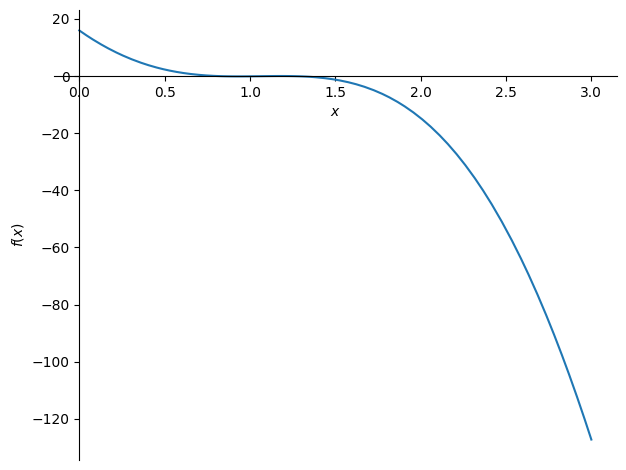

In [ ]:
#Primero trabajamos con la función simbólicamente para que calcule la derivada
x = sp.symbols('x')
y = (x**(5) - (7.3 * x**(4)) + (2.24 * x**(3)) + (30.106* x**(2)) - (42.1 * x) + 15.94) #Acá hay que escribor la función a analizar. OJO que sympy es un poco distinto a numpy
yd = sp.diff(y,x) #Calcula la derivada simbólica
ydd = sp.diff(yd,x)

#Con el comando "sp.lambdify" pasamos a que evalúe numéricamente
f = sp.lambdify(x,y)
fd = sp.lambdify(x,yd)
fdd = sp.lambdify(x,ydd)

plot(y,(x,0,3))

### b)

In [ ]:
iteracionesMax = 1000
tolerancia1 = 10**(-5)
tolerancia2 = 10**(-13)
semilla = 0.5
semilla2 = 1.5

a = 0
b = 3

#Defino la g(x)
def g(x):
   return (-15.94/(x**(4) - (7.3 * x**(3)) + (2.24 * x**(2)) + (30.106* x**(1)) - (42.1)))

#Newton Raphson
tabla_NR_normal_F2_T1 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla_NR_normal_F2_T2 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
NewtonRaphson64Bits(semilla,tolerancia1,iteracionesMax, tabla_NR_normal_F2_T1)
NewtonRaphson64Bits(semilla,tolerancia2,iteracionesMax, tabla_NR_normal_F2_T2)

#Biseccion
tabla_Bi_F2_T1 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla_Bi_F2_T2 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
print (" ")
biseccion(a,b,tolerancia1,iteracionesMax, tabla_Bi_F2_T1)
biseccion(a,b,tolerancia2,iteracionesMax, tabla_Bi_F2_T2)
print (" ")

#Punto Fijo
tabla_PF_F2_T1 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla_PF_F2_T2 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
puntoFijo(semilla,tolerancia1,iteracionesMax, tabla_PF_F2_T1)
puntoFijo(semilla,tolerancia2,iteracionesMax, tabla_PF_F2_T2)

#Secante
tabla_SE_F2_T1 = pd.DataFrame(columns=('Semilla_0','Semilla_1', 'Semilla_2'))
tabla_SE_F2_T2 = pd.DataFrame(columns=('Semilla_0','Semilla_1', 'Semilla_2'))
print ("")
secante(a,b,tolerancia1,iteracionesMax, tabla_SE_F2_T1)
secante(a,b,tolerancia2,iteracionesMax, tabla_SE_F2_T2)
print (" ")

#Newton Raphson Modificado
tabla_NR_modificado_F2_T1 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla_NR_modificado_F2_T2 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
newtonRaphsonModificado(semilla,tolerancia1,iteracionesMax, tabla_NR_modificado_F2_T1)
newtonRaphsonModificado(semilla,tolerancia2,iteracionesMax, tabla_NR_modificado_F2_T2)
print("")


El método de Newton Raphson convergió en 5 iteraciones y el valor de x es: 0.8049885393468358
El método de Newton Raphson convergió en 7 iteraciones y el valor de x es: 0.8049885393483955
 
El método de bisección convergió en 19 iteraciones y el valor de x es:  0.8049831390380859
El método de bisección convergió en 46 iteraciones y el valor de x es:  0.8049885393484288
 
El método de punto fijo convergió en 58 iteraciones y el valor de x es:  0.8049230441557097
El método de punto fijo convergió en 201 iteraciones y el valor de x es:  0.8049885393478123

1.0
1e-05
El método Secante convergió en 10 iteraciones y el valor de la x es  0.8049885277712354
1.0
1e-13
El método Secante convergió en 13 iteraciones y el valor de la x es  0.804988539348394
 
El método de Newton Raphson modificado convergió en 1000 iteraciones y el valor de x es: -2.2003496870339703
El método de Newton Raphson modificado convergió en 1000 iteraciones y el valor de x es: -2.2003496870339703



En este caso no fue complicado como en la primera funcion buscar g(x), en donde esta se pudo buscar al igual que se vio en clases ("despejando" a x). A continuación, se muestra adjuntado el grafico que muestra su existencia.

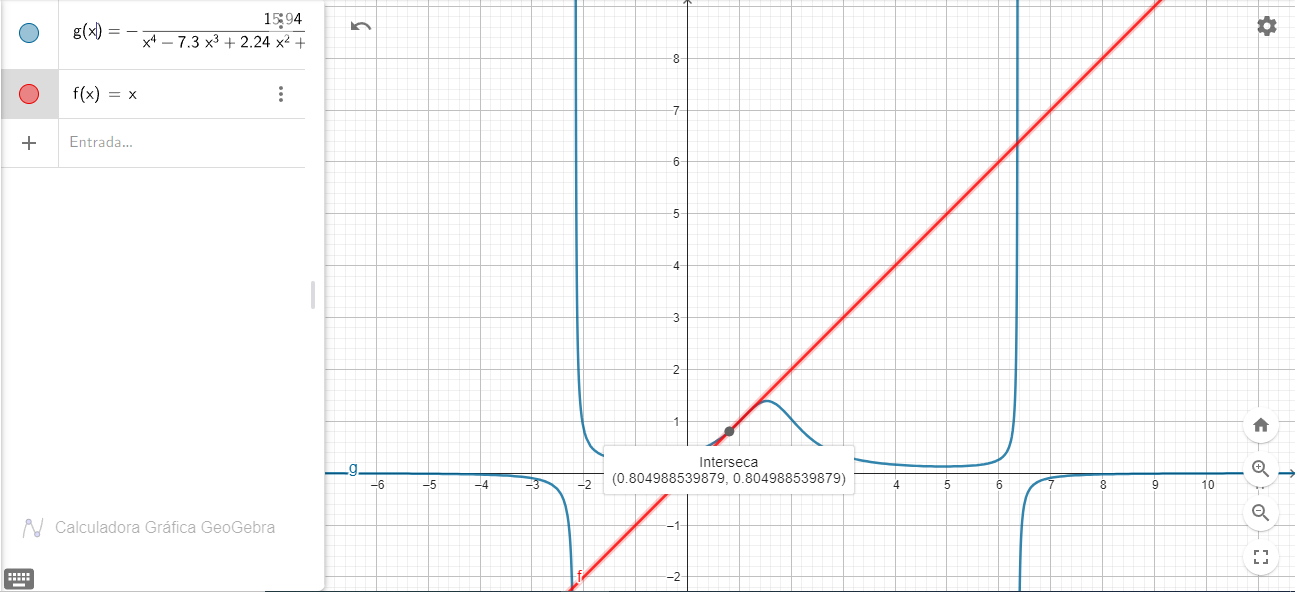

Una vez que ya encontramos la g(x) verificamos que se cumplen las condiciones de existencia y unicidad. Esto se puede ver en los siguientes gráficos tomando el intervalo [0.7, 0.9].
En el primer grafico mostramos la g(x) y en el segundo g'(x).




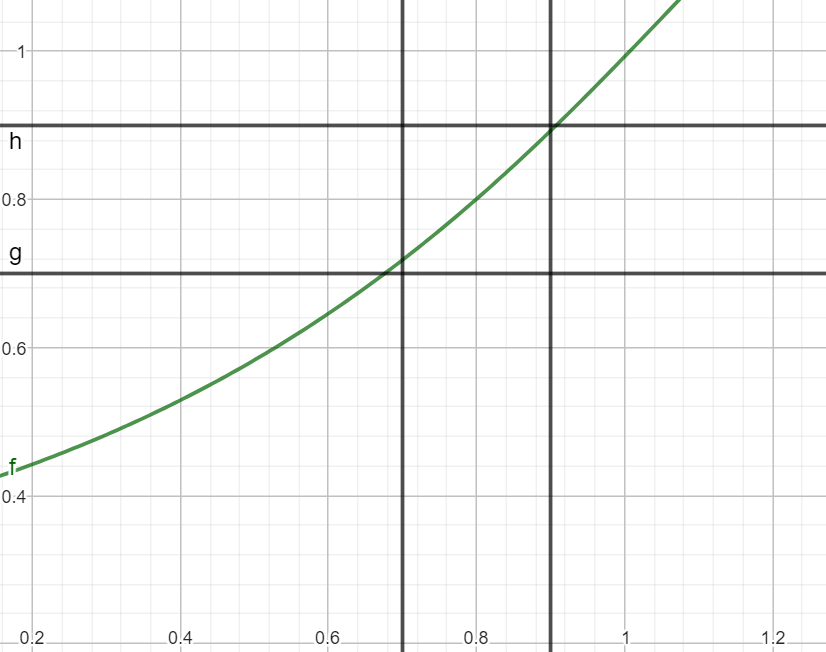

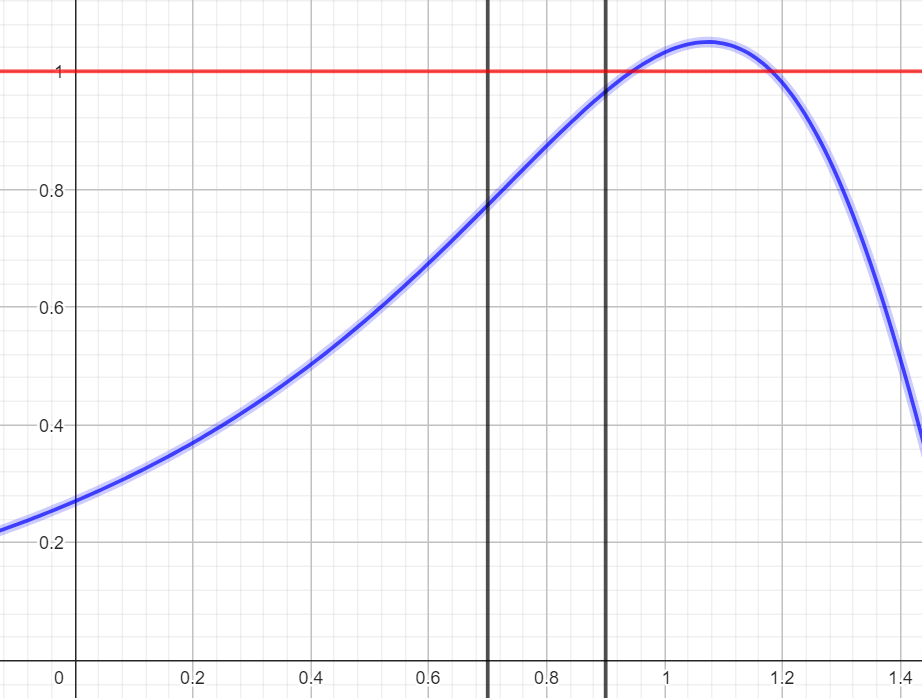

### c)

In [ ]:
x_real_2 = scipy.optimize.brentq(f, 0, 3)

### d)

f2(x) = f3(x) = (x − 0.9)e^(−4(x−0.9)^2)

In [ ]:
#Calculo para la constante asintotica para cada metodo: Uso los ultimos terminos de la sucesion dependiendo de la cantidad maxima.

#Newton Raphson:
Completar_datos(tabla_NR_normal_F2_T1, x_real_2, 2)
Completar_datos(tabla_NR_normal_F2_T2, x_real_2, 2)

#Biseccion:
Completar_datos(tabla_Bi_F2_T1, x_real_2, 1)
Completar_datos(tabla_Bi_F2_T2, x_real_2, 1)


#Punto Fijo:
Completar_datos(tabla_PF_F2_T1, x_real_2, 1)
Completar_datos(tabla_PF_F2_T2, x_real_2, 1)

#Secante:
Completar_datos(tabla_SE_F2_T1, x_real_2, 2)
Completar_datos(tabla_SE_F2_T2, x_real_2, 2)

#Newton Raphson Modificado:
Completar_datos(tabla_NR_modificado_F2_T1, x_real_2, 2)
Completar_datos(tabla_NR_modificado_F2_T2, x_real_2, 2)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


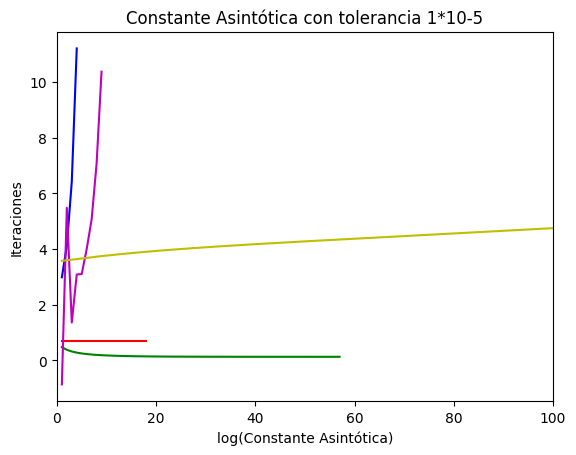

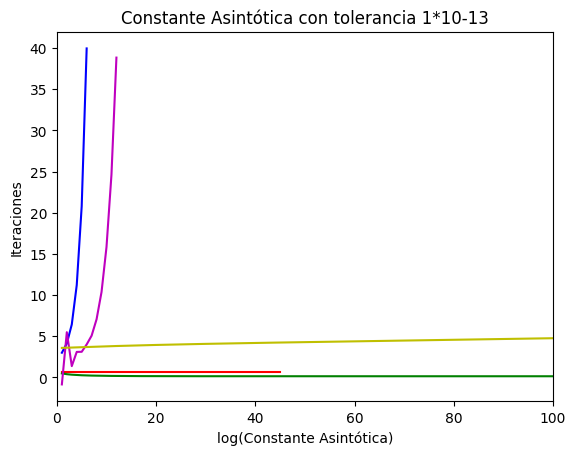

In [ ]:
#Constante asintotica con toletancia 1.

plt.plot(tabla_NR_normal_F2_T1.index,np.log(tabla_NR_normal_F2_T1["Constante_asintotica"]),'b',
         tabla_Bi_F2_T1.index, np.log(tabla_Bi_F2_T1["Constante_asintotica"]),'r',
         tabla_PF_F2_T1.index, np.log(tabla_PF_F2_T1["Constante_asintotica"]),'g',
         tabla_SE_F2_T1.index, np.log(tabla_SE_F2_T1["Constante_asintotica"]),'m',
         tabla_NR_modificado_F2_T1.index,np.log(tabla_NR_modificado_F2_T1["Constante_asintotica"]),'y')

plt.xlabel("log(Constante Asintótica)")
plt.ylabel("Iteraciones")
plt.xlim(0, 100)
plt.title("Constante Asintótica con tolerancia 1*10-5")
plt.show()

print(" ")

#Constante asintotica con toletancia 1.

plt.plot(tabla_NR_normal_F2_T2.index,np.log(tabla_NR_normal_F2_T2["Constante_asintotica"]),'b',
         tabla_Bi_F2_T2.index, np.log(tabla_Bi_F2_T2["Constante_asintotica"]),'r',
         tabla_PF_F2_T2.index, np.log(tabla_PF_F2_T2["Constante_asintotica"]),'g',
         tabla_SE_F2_T2.index, np.log(tabla_SE_F2_T2["Constante_asintotica"]),'m',
         tabla_NR_modificado_F2_T2.index,np.log(tabla_NR_modificado_F2_T2["Constante_asintotica"]),'y')

plt.xlabel("log(Constante Asintótica)")
plt.ylabel("Iteraciones")
plt.xlim(0, 100)
plt.title("Constante Asintótica con tolerancia 1*10-13")
plt.show()

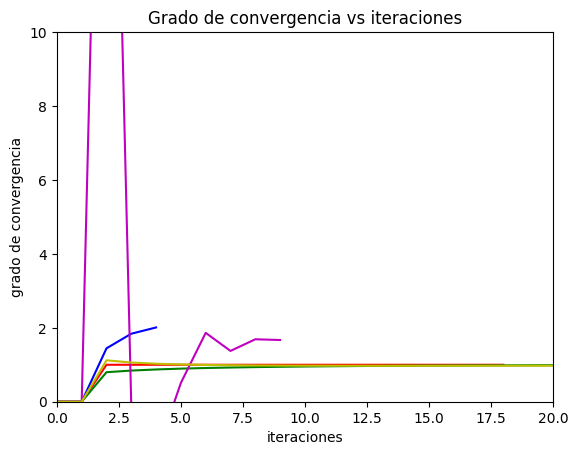

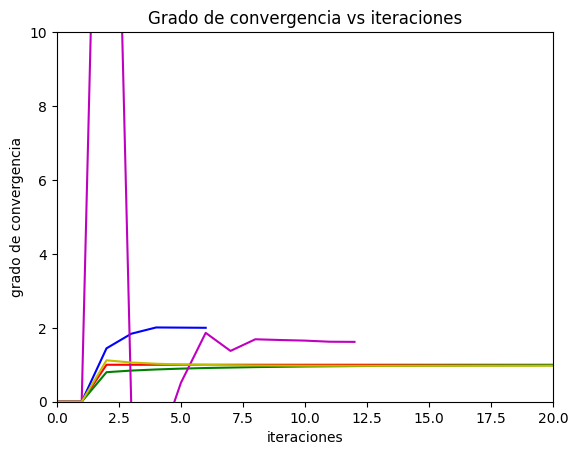

In [ ]:
#Grado de convergencia con tolerancia 1:

plt.plot(tabla_NR_normal_F2_T1.index,tabla_NR_normal_F2_T1.Grado_convergencia,'b',
         tabla_Bi_F2_T1.index, tabla_Bi_F2_T1.Grado_convergencia,'r',
         tabla_PF_F2_T1.index, tabla_PF_F2_T1.Grado_convergencia,'g',
         tabla_SE_F2_T1.index, tabla_SE_F2_T1.Grado_convergencia,'m',
         tabla_NR_modificado_F2_T1.index,tabla_NR_modificado_F2_T1.Grado_convergencia,'y',)

plt.ylabel("grado de convergencia")
plt.xlabel("iteraciones")
plt.xlim(0, 20)
plt.ylim(0, 10)
plt.title("Grado de convergencia vs iteraciones")
plt.show()

print(" ")

#Grado de convergencia con toletancia 2:

plt.plot(tabla_NR_normal_F2_T2.index,tabla_NR_normal_F2_T2.Grado_convergencia,'b',
         tabla_Bi_F2_T2.index, tabla_Bi_F2_T2.Grado_convergencia,'r',
         tabla_PF_F2_T2.index, tabla_PF_F2_T2.Grado_convergencia,'g',
         tabla_SE_F2_T2.index, tabla_SE_F2_T2.Grado_convergencia,'m',
         tabla_NR_modificado_F2_T2.index,tabla_NR_modificado_F2_T2.Grado_convergencia,'y')

plt.ylabel("grado de convergencia")
plt.xlabel("iteraciones")
plt.xlim(0, 20)
plt.ylim(0, 10)
plt.title("Grado de convergencia vs iteraciones")
plt.show()

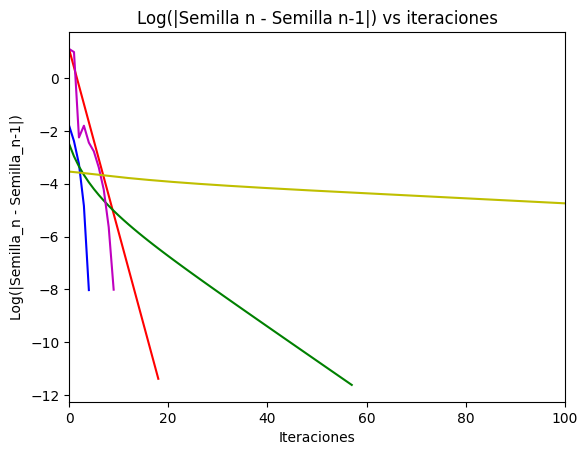

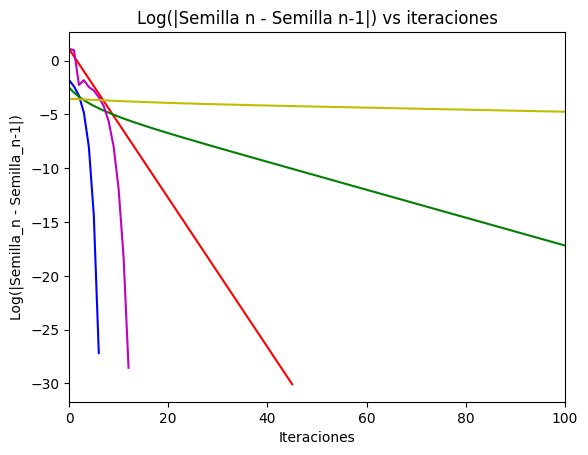

In [ ]:
#Log(|Semilla_1 - Semilla_0|) con toletancia 1.

plt.plot(tabla_NR_normal_F2_T1.index,tabla_NR_normal_F2_T1["Log(|Semilla_1 - Semilla_0|)"],'b',
         tabla_Bi_F2_T1.index, tabla_Bi_F2_T1["Log(|Semilla_1 - Semilla_0|)"],'r',
         tabla_PF_F2_T1.index, tabla_PF_F2_T1["Log(|Semilla_1 - Semilla_0|)"],'g',
         tabla_SE_F2_T1.index, tabla_SE_F2_T1["Log(|Semilla_1 - Semilla_0|)"],'m',
         tabla_NR_modificado_F2_T1.index,tabla_NR_modificado_F2_T1["Log(|Semilla_1 - Semilla_0|)"],'y')

plt.xlabel("Iteraciones")
plt.ylabel("Log(|Semilla_n - Semilla_n-1|)")
plt.xlim(0, 100)
plt.title("Log(|Semilla n - Semilla n-1|) vs iteraciones")
plt.show()

print(" ")

#Log(|Semilla_1 - Semilla_0|) con toletancia 2.

plt.plot(tabla_NR_normal_F2_T2.index,tabla_NR_normal_F2_T2["Log(|Semilla_1 - Semilla_0|)"],'b',
         tabla_Bi_F2_T2.index, tabla_Bi_F2_T2["Log(|Semilla_1 - Semilla_0|)"],'r',
         tabla_PF_F2_T2.index, tabla_PF_F2_T2["Log(|Semilla_1 - Semilla_0|)"],'g',
         tabla_SE_F2_T2.index, tabla_SE_F2_T2["Log(|Semilla_1 - Semilla_0|)"],'m',
         tabla_NR_modificado_F2_T2.index,tabla_NR_modificado_F2_T2["Log(|Semilla_1 - Semilla_0|)"],'y')

plt.xlabel("Iteraciones")
plt.ylabel("Log(|Semilla_n - Semilla_n-1|)")
plt.xlim(0, 100)
plt.title("Log(|Semilla n - Semilla n-1|) vs iteraciones")
plt.show()

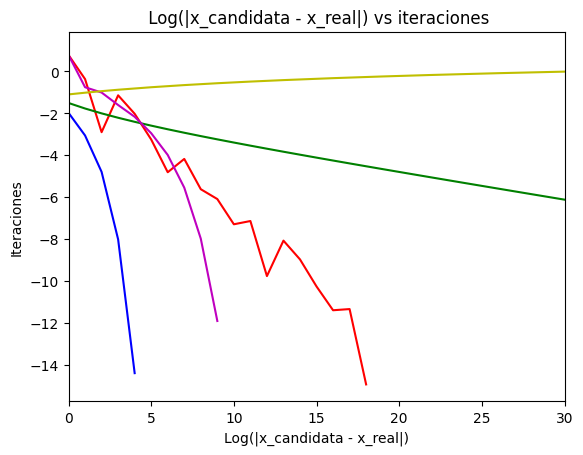

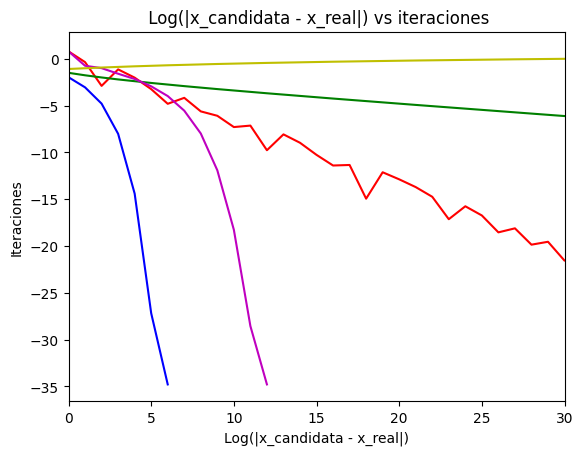

In [ ]:
#Log(|x_candidata - x_real|) con toletancia 1.

plt.plot(tabla_NR_normal_F2_T1.index,tabla_NR_normal_F2_T1["Log(|x_candidata - x_real|)"],'b',
         tabla_Bi_F2_T1.index, tabla_Bi_F2_T1["Log(|x_candidata - x_real|)"],'r',
         tabla_PF_F2_T1.index, tabla_PF_F2_T1["Log(|x_candidata - x_real|)"],'g',
         tabla_SE_F2_T1.index, tabla_SE_F2_T1["Log(|x_candidata - x_real|)"],'m',
         tabla_NR_modificado_F2_T1.index,tabla_NR_modificado_F2_T1["Log(|x_candidata - x_real|)"],'y')

plt.xlabel("Log(|x_candidata - x_real|)")
plt.ylabel("Iteraciones")
plt.xlim(0, 30)
plt.title(" Log(|x_candidata - x_real|) vs iteraciones")
plt.show()

print(" ")

#Log(|x_candidata - x_real|) con toletancia 2.

plt.plot(tabla_NR_normal_F2_T2.index,tabla_NR_normal_F2_T2["Log(|x_candidata - x_real|)"],'b',
         tabla_Bi_F2_T2.index, tabla_Bi_F2_T2["Log(|x_candidata - x_real|)"],'r',
         tabla_PF_F2_T2.index, tabla_PF_F2_T2["Log(|x_candidata - x_real|)"],'g',
         tabla_SE_F2_T2.index, tabla_SE_F2_T2["Log(|x_candidata - x_real|)"],'m',
         tabla_NR_modificado_F2_T2.index,tabla_NR_modificado_F2_T2["Log(|x_candidata - x_real|)"],'y')

plt.xlabel("Log(|x_candidata - x_real|)")
plt.ylabel("Iteraciones")
plt.xlim(0, 30)
plt.title(" Log(|x_candidata - x_real|) vs iteraciones")
plt.show()

### **Función f2**


A partir de aplicar los métodos de busqueda de raíces podemos ver que todos ellos convergieron en un valor similar, pero con distinta cantidad de iteraciones. Los comportamientos de los métodos fueron los esperados.


**Newton-Raphson modificado**


En general, en este método al implementarse a una función que no tiene raíces multiples no se sabe lo que puede ocurrir (converge o diverge). En este caso,diverge.

**Newton-Raphson**

En este caso el metodo de Newton Raphson funciona adecuadamente según la teoría dado que la semilla que se utiliza es considerada cercana a la raiz que se quiere encontrar. Por lo tanto, es el metodo que converge más rápidamente.

**Punto Fijo**


A diferencia de la función anterior la cantidad de iteraciones en comparación a Newton Raphson es mucho mayor, pero esto puede suceder ya que al tener un grado de convergencia supra linial su valor de convergencia puede estar más cerca de uno que de dos. Esto se da por el valor de la semilla y la g(x) elegida. Esto se puede verificar con el grafico Grado de Convergencia vs iteraciones, en el cual se ve claramente que el grado tiende a uno. En el caso de los últimos dos gráficos se aprecia como se va acercando al valor real y como la diferencia entre dos iteraciones consecutivas va siendo cada vez menor, pero de una forma más lenta que Newton Raphson y la Secante dado a su grado de convergencia cuadrático. Al mismo tiempo se puede ver que converge más lento que la bisección, esto sucede dado que su grado de convergencia tiende a uno más lentamente.



**Bisección**

El comportamiento es el esperado al igual que en la primera función dado que a diferencia del resto de los métodos lo unico que nos importa es si la raiz está en el intervalo [a,b] y como esto sucede sabemos que va a converger de manera linial. Esto se refleja en la similitud de este método en los gráficos de la primera función y en los de la misma.


**Secante**

En este caso las semillas no son lo suficientemente cercanas para que converga a la misma velocidad que Newton Raphson, pero igualmente converge más rápido que los demás métodos, esto es lógico porque tiene una convergencia supra linial. A diferencia de la primera función la cantidad de iteraciones fueron suficiente para determinar el grado de convergencia, que en este caso tiende a dos, pero más lentamente que Newton Raphson.


### Analisis de gráficos:


•	Constante asintótica: A diferencia de la funcion anterior, este grafico si nos permite apreciar la eficiencia de los metodos de busqueda de raíces, en donde los valores si son acordes a la rapidez en la que convergen los metodos. Para empezar, con Bisección y Newton Raphson modificado puede ineficientes dado que el logaritmo de la constante no toma valores elevados. A diferencia de antes, Punto Fijo también es ineficiente a simple vista si lo comparamos con Newton Raphson y la Secante, ya que estados dos últimos tienden mucho más rápido a infinito que el primer metodo.


•	Grado de convergencia: Se puede apreciar como los resultados en base a la teoría son los esperados. Tanto Newton Raphson y la secante convergen tan rápidamente que no puede verse realmente su grado de convergencia cuadrático debido a las pocas iteraciones realizadas. Por otro lado, y para los tres metodo restantes, puede verse que su grado de convergencia es similar a un orden lineal dado a que todos los metodos convergen de forma ineficiente, en especial Newton Raphson modificado.


•	Diferencia en escala logarítmica entre dos iteraciones consecutiva: En este aspecto, no hay nada fuera de lo común con respecto a la teoría, en donde tanto con Newton Raphson y Secante, su diferencia en escala logarítmica entre iteraciones sucesivas tiende rápidamente a menos infinito dado a que las diferencias son los suficientemente pequeñas para tender a 0 rápidamente, en especial Newton Raphson. En cambio, los otros tres metodos tienden a menos infinito muy lentamente dado a su grado de convergencia en estos casos.


•	Diferencia en escala logarítmica entre la iteración_n y el valor "real" de la raíz: Estamos ante un caso similar a la grafico explicada en el item anterior. Se siguen manteniendo todas las tendencias con la diferencia, tal como ocurrió con la primera funcion, en el metodo de la bisección ya que este tiende menos infinito de forma oscilante y no "linealmente".


## Función f3

### a)

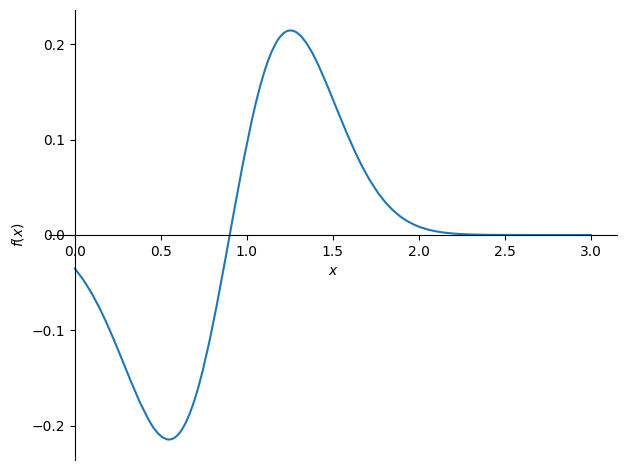

In [ ]:
#a)
#Primero trabajamos con la función simbólicamente para que calcule la derivada
x = sp.symbols('x')
y = ((x-0.9)*np.e**(-4*(x-0.9)**(2))) #Acá hay que escribor la función a analizar. OJO que sympy es un poco distinto a numpy
yd = sp.diff(y,x) #Calcula la derivada simbólica
ydd = sp.diff(yd,x)

#Con el comando "sp.lambdify" pasamos a que evalúe numéricamente
f = sp.lambdify(x,y)
fd = sp.lambdify(x,yd)
fdd = sp.lambdify(x,ydd)

plot(y,(x,0,3))


### b)

In [ ]:
iteracionesMax = 700
tolerancia1 = 10**(-5)
tolerancia2 = 10**(-13)
semilla = 0.5
#Se realizaron tres pasos de biseccion para la semilla de NR para que pueda converger.
semilla_NR = 0.75

a = 0
b = 3

#Defino la g(x)

def g(x):
   return (x-(x-0.9)*np.e**(-4*(x-0.9)**(2)))

#Newton Raphson
tabla_NR_normal_F3_T1 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla_NR_normal_F3_T2 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
NewtonRaphson64Bits(semilla_NR,tolerancia1,iteracionesMax, tabla_NR_normal_F3_T1)
NewtonRaphson64Bits(semilla_NR,tolerancia2,iteracionesMax, tabla_NR_normal_F3_T2)

#Biseccion
tabla_Bi_F3_T1 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla_Bi_F3_T2 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
print (" ")
biseccion(a,b,tolerancia1,iteracionesMax, tabla_Bi_F3_T1)
biseccion(a,b,tolerancia2,iteracionesMax, tabla_Bi_F3_T2)
print (" ")

#Punto Fijo

tabla_PF_F3_T1 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla_PF_F3_T2 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
puntoFijo(semilla,tolerancia1,iteracionesMax, tabla_PF_F3_T1)
puntoFijo(semilla,tolerancia2,iteracionesMax, tabla_PF_F3_T2)

#Secante
tabla_SE_F3_T1 = pd.DataFrame(columns=('Semilla_0','Semilla_1', 'Semilla_2'))
tabla_SE_F3_T2 = pd.DataFrame(columns=('Semilla_0','Semilla_1', 'Semilla_2'))
print ("")
secante(a,b,tolerancia1,iteracionesMax, tabla_SE_F3_T1)
secante(a,b,tolerancia2,iteracionesMax, tabla_SE_F3_T2)
print (" ")

#Newton Raphson Modificado
tabla_NR_modificado_F3_T1 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
tabla_NR_modificado_F3_T2 = pd.DataFrame(columns=('Semilla_0','Semilla_1'))
newtonRaphsonModificado(semilla,tolerancia1,iteracionesMax, tabla_NR_modificado_F3_T1)
newtonRaphsonModificado(semilla,tolerancia2,iteracionesMax, tabla_NR_modificado_F3_T2)
print("")


El método de Newton Raphson convergió en 3 iteraciones y el valor de x es: 0.9
El método de Newton Raphson convergió en 4 iteraciones y el valor de x es: 0.9
 
El método de bisección convergió en 19 iteraciones y el valor de x es:  0.9000034332275391
El método de bisección convergió en 45 iteraciones y el valor de x es:  0.8999999999999488
 
El método de punto fijo convergió en 4 iteraciones y el valor de x es:  0.8999999999989563
El método de punto fijo convergió en 5 iteraciones y el valor de x es:  0.9

1.0
1e-05
El método Secante convergió en 1 iteraciones y el valor de la x es  2.9999960982724896
1.0
1e-13
El método Secante convergió en 700 iteraciones y el valor de la x es  12.135106671661655
 
El método de Newton Raphson modificado convergió en 3 iteraciones y el valor de x es: 0.9
El método de Newton Raphson modificado convergió en 4 iteraciones y el valor de x es: 0.9



Al igual que para la primera función, al ver que no dio resultados buscar a g(x) como lo vimos en la cursada; decidimos volver a probar funciones de la forma g(x) = x-ϕ(x)f(x), en donde hay que notar que, para este caso, g(x) = x - f(x), con lo cual, fue más sencillo de encontrar a g(x) admisible en algún intervalo. A continuación, se muestra la imagen del gráfico.

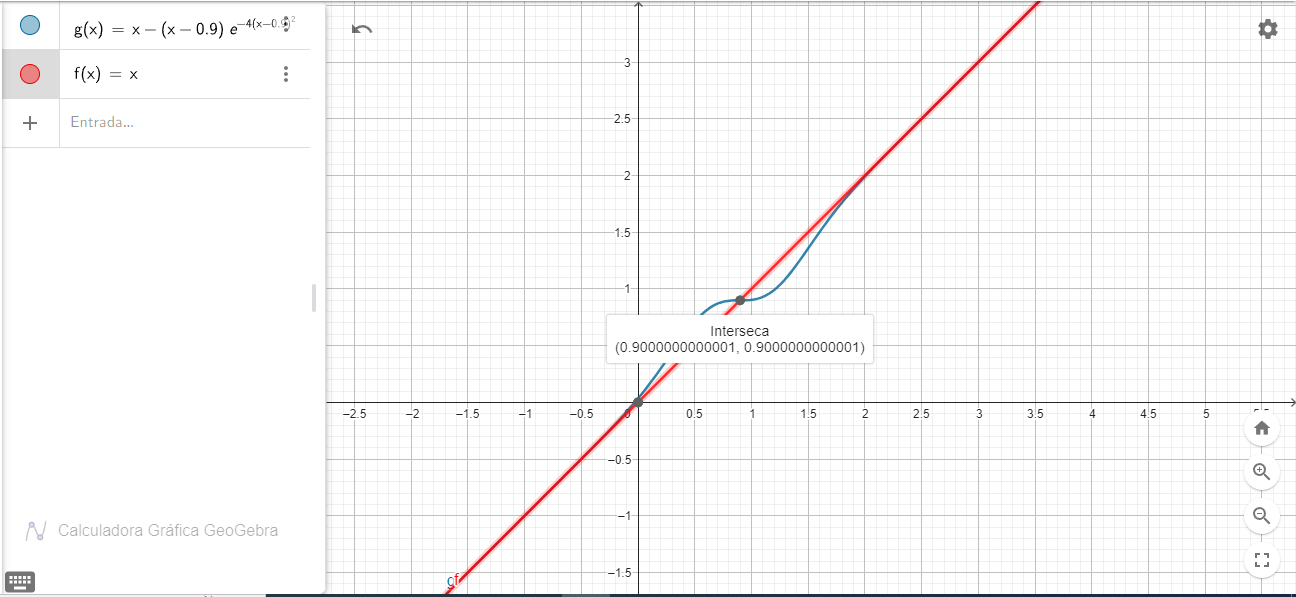

Al igual que en las primeras dos funciones lo que hicimos fue probar la existencia y unicidad una vez ya encontrada la g(x). En este caso trabajamos con el intervalo [0.87, 0.92].


En el primer grafico mostramos la g(x) y en el segundo g'(x).


**Existencia**
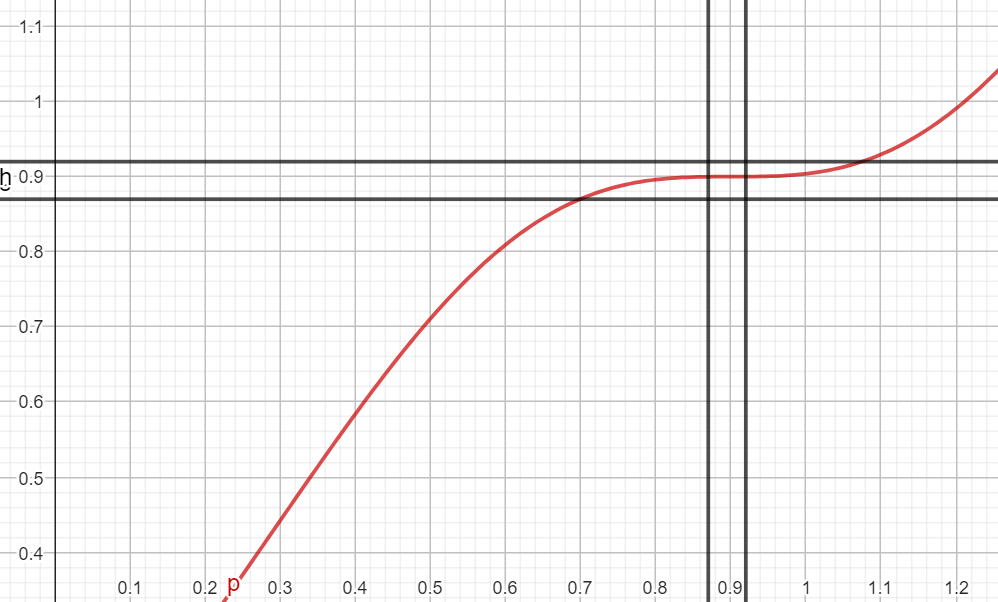

**Unicidad**

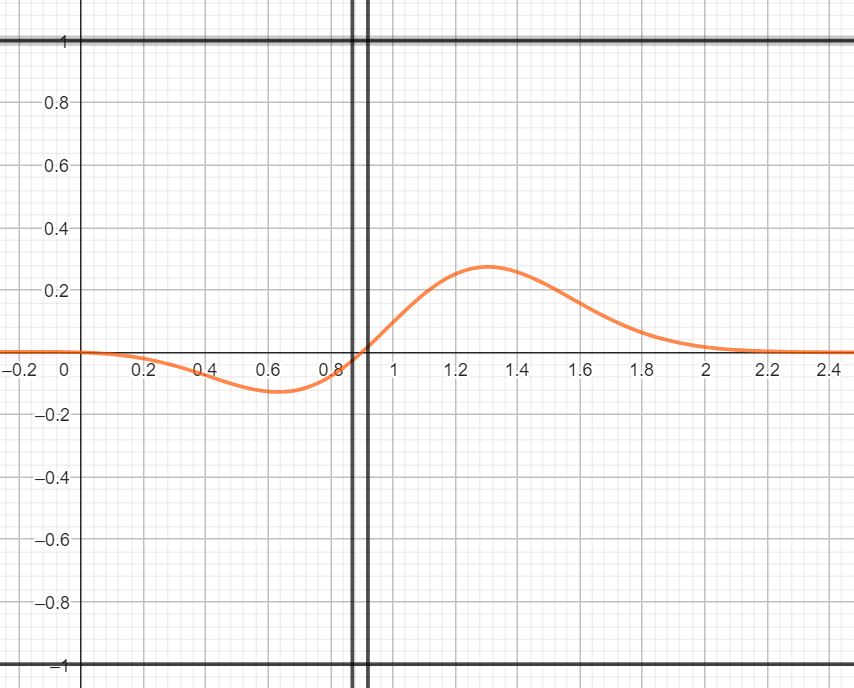

### c)

In [ ]:
x_real_3 = scipy.optimize.brentq(f, 0, 3)

### d)

In [ ]:
#Calculo para la constante asintotica para cada metodo: Uso los ultimos terminos de la sucesion dependiendo de la cantidad maxima.

#Newton Raphson:
Completar_datos(tabla_NR_normal_F3_T1, x_real_3, 2)
Completar_datos(tabla_NR_normal_F3_T2, x_real_3, 2)

#Biseccion:
Completar_datos(tabla_Bi_F3_T1, x_real_3, 1)
Completar_datos(tabla_Bi_F3_T2, x_real_3, 1)


#Punto Fijo:
Completar_datos(tabla_PF_F3_T1, x_real_3, 1)
Completar_datos(tabla_PF_F3_T2, x_real_3, 1)

#Secante:
Completar_datos(tabla_SE_F3_T1, x_real_3, 2)
Completar_datos(tabla_SE_F3_T2, x_real_3, 2)

#Newton Raphson Modificado:
Completar_datos(tabla_NR_modificado_F3_T1, x_real_3, 2)
Completar_datos(tabla_NR_modificado_F3_T2, x_real_3, 2)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


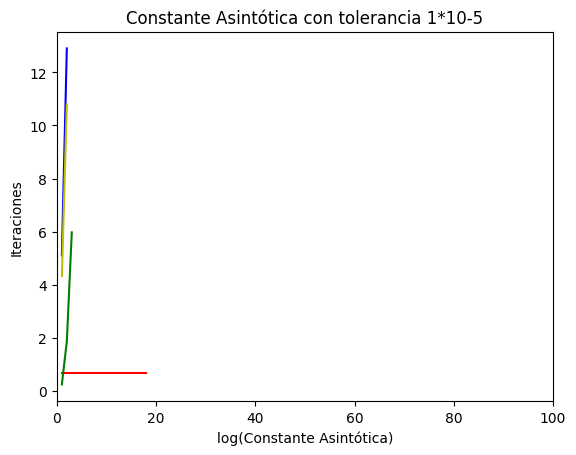

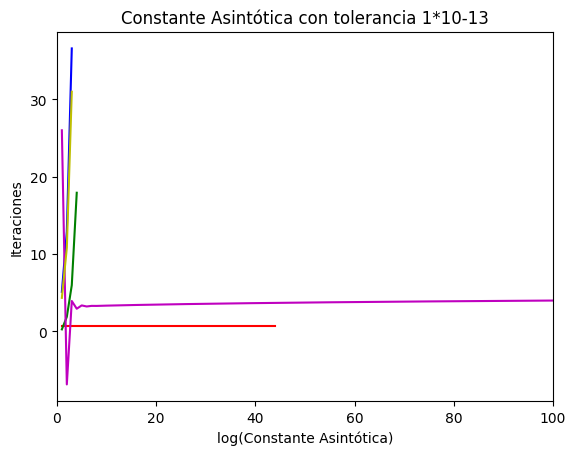

In [ ]:
plt.plot(tabla_NR_normal_F3_T1.index,np.log(tabla_NR_normal_F3_T1["Constante_asintotica"]),'b',
         tabla_Bi_F3_T1.index, np.log(tabla_Bi_F3_T1["Constante_asintotica"]),'r',
         tabla_PF_F3_T1.index, np.log(tabla_PF_F3_T1["Constante_asintotica"]),'g',
         tabla_SE_F3_T1.index, np.log(tabla_SE_F3_T1["Constante_asintotica"]),'m',
         tabla_NR_modificado_F3_T1.index,np.log(tabla_NR_modificado_F3_T1["Constante_asintotica"]),'y')

plt.xlabel("log(Constante Asintótica)")
plt.ylabel("Iteraciones")
plt.xlim(0, 100)
plt.title("Constante Asintótica con tolerancia 1*10-5")
plt.show()

print(" ")

#Constante asintotica con toletancia 1.

plt.plot(tabla_NR_normal_F3_T2.index,np.log(tabla_NR_normal_F3_T2["Constante_asintotica"]),'b',
         tabla_Bi_F3_T2.index, np.log(tabla_Bi_F3_T2["Constante_asintotica"]),'r',
         tabla_PF_F3_T2.index, np.log(tabla_PF_F3_T2["Constante_asintotica"]),'g',
         tabla_SE_F3_T2.index, np.log(tabla_SE_F3_T2["Constante_asintotica"]),'m',
         tabla_NR_modificado_F3_T2.index,np.log(tabla_NR_modificado_F3_T2["Constante_asintotica"]),'y')

plt.xlabel("log(Constante Asintótica)")
plt.ylabel("Iteraciones")
plt.xlim(0, 100)
plt.title("Constante Asintótica con tolerancia 1*10-13")
plt.show()

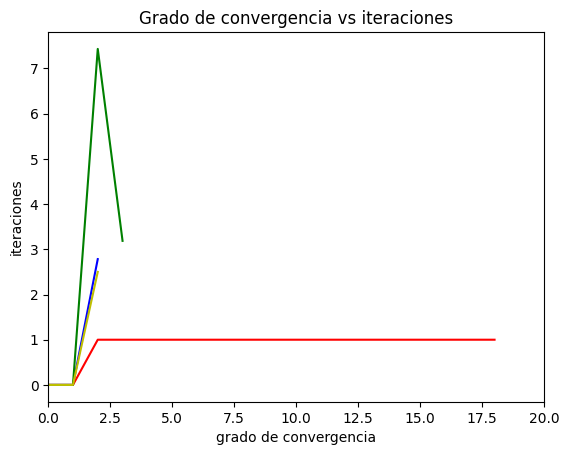

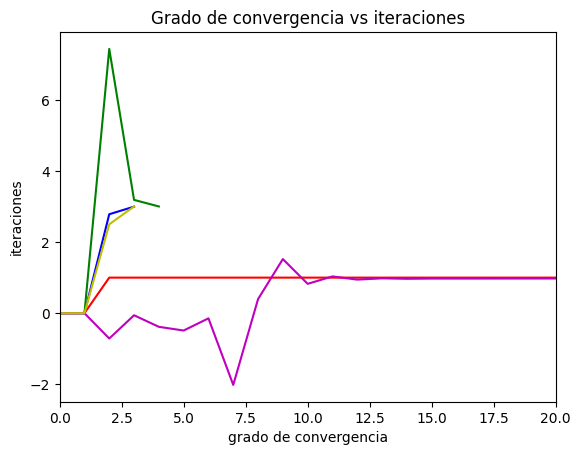

In [ ]:
#Grado de convergencia con tolerancia 1:

plt.plot(tabla_NR_normal_F3_T1.index,tabla_NR_normal_F3_T1.Grado_convergencia,'b',
         tabla_Bi_F3_T1.index, tabla_Bi_F3_T1.Grado_convergencia,'r',
         tabla_PF_F3_T1.index, tabla_PF_F3_T1.Grado_convergencia,'g',
         tabla_SE_F3_T1.index, tabla_SE_F3_T1.Grado_convergencia,'m',
         tabla_NR_modificado_F3_T1.index,tabla_NR_modificado_F3_T1.Grado_convergencia,'y',)

plt.xlabel("grado de convergencia")
plt.ylabel("iteraciones")
plt.xlim(0, 20)
plt.title("Grado de convergencia vs iteraciones")
plt.show()

print(" ")

#Grado de convergencia con toletancia 2:

plt.plot(tabla_NR_normal_F3_T2.index,tabla_NR_normal_F3_T2.Grado_convergencia,'b',
         tabla_Bi_F3_T2.index, tabla_Bi_F3_T2.Grado_convergencia,'r',
         tabla_PF_F3_T2.index, tabla_PF_F3_T2.Grado_convergencia,'g',
         tabla_SE_F3_T2.index, tabla_SE_F3_T2.Grado_convergencia,'m',
         tabla_NR_modificado_F3_T2.index,tabla_NR_modificado_F3_T2.Grado_convergencia,'y')

plt.xlabel("grado de convergencia")
plt.ylabel("iteraciones")
plt.xlim(0, 20)
plt.title("Grado de convergencia vs iteraciones")
plt.show()

In [ ]:
tabla_SE_F3_T1

,Semilla_0,Semilla_1,Semilla_2,Constante_asintotica,Grado_convergencia,Log(|Semilla_1 - Semilla_0|),Log(|x_candidata - x_real|)
0,0.0,3.0,2.999996,0,0,1.098612,0.741937


In [ ]:
tabla_SE_F3_T2

,Semilla_0,Semilla_1,Semilla_2,Constante_asintotica,Grado_convergencia,Log(|Semilla_1 - Semilla_0|),Log(|x_candidata - x_real|)
0,0.000000,3.000000,2.999996,0.000000e+00,0.000000,1.098612,0.741937
1,3.000000,2.999996,3.061258,1.970640e+11,0.000000,-12.454091,0.741935
2,2.999996,3.061258,3.096054,1.039612e-03,-0.712884,-2.792592,0.770691
3,3.061258,3.096054,3.139285,5.059943e+01,-0.058549,-3.358266,0.786662
4,3.096054,3.139285,3.178173,1.861779e+01,-0.383744,-3.141192,0.806157
...,...,...,...,...,...,...,...
695,12.088670,12.096423,12.104171,1.290757e+02,0.998607,-4.859703,2.415594
696,12.096423,12.104171,12.111913,1.291652e+02,0.998609,-4.860398,2.416286
697,12.104171,12.111913,12.119649,1.292546e+02,0.998611,-4.861091,2.416977
698,12.111913,12.119649,12.127381,1.293440e+02,0.998613,-4.861783,2.417667


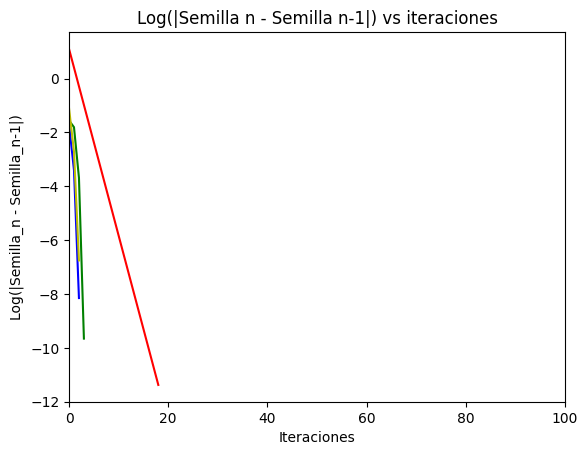

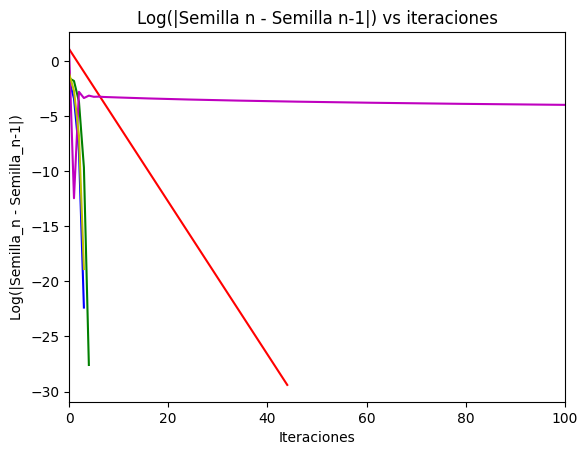

In [ ]:
#Log(|Semilla_1 - Semilla_0|) con toletancia 1.

plt.plot(tabla_NR_normal_F3_T1.index,tabla_NR_normal_F3_T1["Log(|Semilla_1 - Semilla_0|)"],'b',
         tabla_Bi_F3_T1.index, tabla_Bi_F3_T1["Log(|Semilla_1 - Semilla_0|)"],'r',
         tabla_PF_F3_T1.index, tabla_PF_F3_T1["Log(|Semilla_1 - Semilla_0|)"],'g',
         tabla_SE_F3_T1.index, tabla_SE_F3_T1["Log(|Semilla_1 - Semilla_0|)"],'m',
         tabla_NR_modificado_F3_T1.index,tabla_NR_modificado_F3_T1["Log(|Semilla_1 - Semilla_0|)"],'y')

plt.xlabel("Iteraciones")
plt.ylabel("Log(|Semilla_n - Semilla_n-1|)")
plt.xlim(0, 100)
plt.title("Log(|Semilla n - Semilla n-1|) vs iteraciones")
plt.show()

print(" ")

#Log(|Semilla_1 - Semilla_0|) con toletancia 2.

plt.plot(tabla_NR_normal_F3_T2.index,tabla_NR_normal_F3_T2["Log(|Semilla_1 - Semilla_0|)"],'b',
         tabla_Bi_F3_T2.index, tabla_Bi_F3_T2["Log(|Semilla_1 - Semilla_0|)"],'r',
         tabla_PF_F3_T2.index, tabla_PF_F3_T2["Log(|Semilla_1 - Semilla_0|)"],'g',
         tabla_SE_F3_T2.index, tabla_SE_F3_T2["Log(|Semilla_1 - Semilla_0|)"],'m',
         tabla_NR_modificado_F3_T2.index,tabla_NR_modificado_F3_T2["Log(|Semilla_1 - Semilla_0|)"],'y')

plt.xlabel("Iteraciones")
plt.ylabel("Log(|Semilla_n - Semilla_n-1|)")
plt.xlim(0, 100)
plt.title("Log(|Semilla n - Semilla n-1|) vs iteraciones")
plt.show()

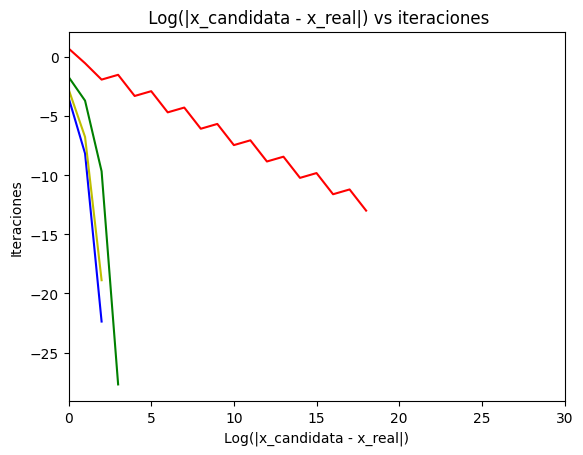

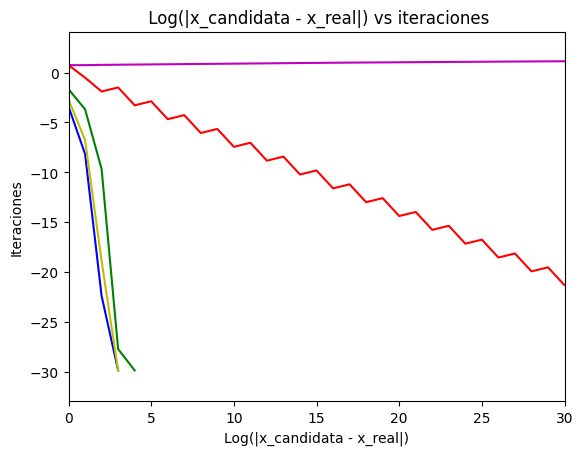

In [ ]:
#Log(|x_candidata - x_real|) con toletancia 1.

plt.plot(tabla_NR_normal_F3_T1.index,tabla_NR_normal_F3_T1["Log(|x_candidata - x_real|)"],'b',
         tabla_Bi_F3_T1.index, tabla_Bi_F3_T1["Log(|x_candidata - x_real|)"],'r',
         tabla_PF_F3_T1.index, tabla_PF_F3_T1["Log(|x_candidata - x_real|)"],'g',
         tabla_SE_F3_T1.index, tabla_SE_F3_T1["Log(|x_candidata - x_real|)"],'m',
         tabla_NR_modificado_F3_T1.index,tabla_NR_modificado_F3_T1["Log(|x_candidata - x_real|)"],'y')

plt.xlabel("Log(|x_candidata - x_real|)")
plt.ylabel("Iteraciones")
plt.xlim(0, 30)
plt.title(" Log(|x_candidata - x_real|) vs iteraciones")
plt.show()

print(" ")

#Log(|x_candidata - x_real|) con toletancia 2.

plt.plot(tabla_NR_normal_F3_T2.index,tabla_NR_normal_F3_T2["Log(|x_candidata - x_real|)"],'b',
         tabla_Bi_F3_T2.index, tabla_Bi_F3_T2["Log(|x_candidata - x_real|)"],'r',
         tabla_PF_F3_T2.index, tabla_PF_F3_T2["Log(|x_candidata - x_real|)"],'g',
         tabla_SE_F3_T2.index, tabla_SE_F3_T2["Log(|x_candidata - x_real|)"],'m',
         tabla_NR_modificado_F3_T2.index,tabla_NR_modificado_F3_T2["Log(|x_candidata - x_real|)"],'y')

plt.xlabel("Log(|x_candidata - x_real|)")
plt.ylabel("Iteraciones")
plt.xlim(0, 30)
plt.title(" Log(|x_candidata - x_real|) vs iteraciones")
plt.show()

### **Función f3**


En este caso y a diferencia de las otras dos funciones, al aplicar los metodos de búsqueda de raíces, podes apreciar que hay varias irregularidades, a simple viste en lo que respecta a la teoría.

**Newton-Raphson modificado**

Se puede observar claramente no sigue con el comportamiento esperado tal como sucedió en los casos anteriores. Como se vio en el gráfico de la funcion, estamos ante un caso en donde la multiplicidad de la raiz es simple; no obstante, fue el metodo más eficiente de todos en los que respecta a iteraciones. Una posible explicación de esto es que al aplicar el metodo para casos en donde la multiplicidad de la raiz es igual a 1, no se sabe que es lo que puede suceder; en donde puede ocurrir que el metodo diverja, converja en muchas iteraciones (casos anteriores) o directamente encuentre la raiz en relativamente pocas iteraciones como sucede en este caso.


**Newton-Raphson**


Podría decirse que es inesperado que este metodo diverja para la semilla dada, ya que nosotros consideramos que es un valor cercano a la raiz; no obstante, el termino de "cercanía" de una semilla depende de la funcion en cuestión, en donde la semilla dada, para este caso, no es lo suficientemente cercana para que le metodo converja, provocando que nunca se encuentre la raiz.


**Punto Fijo**


En este caso, este metodo ha sido muy similar que el ya explicado Newton Raphson modificado, en donde dada la g(x) propuesta como x - f(x), resulta que, en combinación con la semilla dada, genera que el metodo sea eficiente y converja de manera supra lineal.


**Bisección**


Al igual que en las funciones anteriores, bisección mantiene la tendencia lineal de convergencia y no presenta nada lo suficientemente fuera de lo común como para poder aportar al que no se haya visto en los casos anteriores.


**Secante**


En este caso, el metodo presenta un comportamiento que, a decir verdad, no podemos analizar ya que depende de la tolerancia dada. Para la tolerancia 2 no hay nada nuevo, el metodo diverge dado a las semillas elegidas; el tema viene con la tolerancia 1. Al usar el valor 10**(-5) o un valor superior, el metodo simplemente no funciona, devolviendo en una iteración la diferencia absoluta de los extremos del intervalo [a, b], pero con una tolerancia inferior, el metodo se comporta similar al caso de la segunda tolerancia. Cabe aclarar, que, para el análisis de los gráficos, vamos a tener en cuenta la segunda tolerancia ya que, con la primera, no se puede analizar nada.


###Analisis de gráficos:


•	Constante asintótica: Esta funcion presenta varios casos particulares en comparación a las otras funciones en lo que respecta a este item. Todas las tendencias en lo que respecta a la convergencia si pueden verse reflejadas en estas graficas dado a que Newton Raphson toma un valor muy elevado provocando que tienda a infinito muy rápidamente. En lo que respecta a Punto Fijo y bisección no hay nada que no se haya mencionado antes, no obstante, el comportamiento de la constante en los que respecta a Newton Raphson normal y la Secante es bastante errado dado a que ambos metodos divergen por las semillas dadas.



•	Grado de convergencia: En este caso, tanto Newton Raphson como el metodo de la Secante, se comportan linealmente en lo que respecta a sus grados de convergencia (a pesar de que divergen). Bisección no presenta nada fuera de lo común. Luego, tanto Punto Fijo como Newton Raphson modificado, convergen en tan pocas iteraciones, que llega a apreciarse su grado de convergencia, pero en base a la teoría, debería ser similar al grado 2.



•	Diferencia en escala logarítmica entre dos iteraciones consecutiva: En este caso, podemos apreciar que Punto Fijo y Newton Raphson modificados tienden más rápidamente a menos infinito que el resto, dado a que convergen muy rápidamente. Luego bisección tiene a infinito lentamente con relación a los otros dos métodos mencionados anteriormente. Por último, se puede apreciar que a pesar de que tanto Newton Raphson normal como el metodo de la Secante divergen, su diferencia entre iteraciones sucesivas si tiende a menos infinito pero muy lentamente dado a sus grados de convergencia.


•	Diferencia en escala logarítmica entre la iteración_n y el valor "real" de la raíz: Se puede ver que en los casos de Punto Fijo y Newton Raphson modificado, al igual que el item anterior, tienden a menos infinito muy rápidamente dado a que las semillas por cada iteración están muy cercana al valor real de la raiz. Luego bisección al igual que en las dos funciones anteriores, tiene a menos infinito de manera oscilatoria.

Lo interesante es que en este gráfico y en comparación al item anterior, si puede verse con claridad, la divergencia del metodo, dado a que la diferencia logarítmica para los casos de Newton Raphson y Secante, tienden a infinito positivo, dando a entender justamente que las "candidatas" estan relativamente lejos de la raiz.

Aclaración: Se modifico la semilla de NR a 0.75 para que pueda converger con este metodo; sin embargo, para todos los graficos se uso la semilla 0.5, con lo cual el comportamiento de los graficos de NR teneiendo en cuneta que diverge y no que converge.
